In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import pandas as pd    # digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt   # digunakan untuk visualisasi data
# import seaborn as sns   # juga digunakan untuk visualisasi data



from sklearn.model_selection import(   # digunakan untuk validasi silang dan hyperparameter tuning
    train_test_split,
    RandomizedSearchCV,
    cross_val_score,
)


import math
import warnings



import time




import pickle
import re

import pyarrow.feather as feather
import pandas as pd

import pyarrow as pa
import pyarrow.parquet as pq

# from nltk.tokenize import word_tokenize

import string
import sys
# sys.path.append('/content/indonlu')
# from transformers import  BertConfig, BertTokenizer,BertForSequenceClassification


import torch
from torch import optim


import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Viz
import matplotlib.pyplot as plt
# import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud

#Model IndoBERT
import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import gdown
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
# from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
# from indonlu.utils.forward_fn import forward_sequence_classification
# from indonlu.utils.metrics import document_sentiment_metrics_fn

In [ ]:

kamus_alay_url='https://drive.google.com/uc?id=14M5i-Dd_oFCCJf4avgTEQeZLO5PCKCzy'
kamus_alay_path=r'C:\Lomba\UNITY UNY\Data Mining\resources\kamus_alay.csv'
kamus_singkatan_url='https://drive.google.com/uc?id=1f1aOazCYJXCnhg7Brf5GelE7yE8-QflK'
kamus_singkatan_path=r'C:\Lomba\UNITY UNY\Data Mining\resources/kamus_singkatan.csv'
gdown.download(kamus_alay_url, kamus_alay_path, quiet=False)
gdown.download(kamus_singkatan_url, kamus_singkatan_path, quiet=False)

In [ ]:
df_kesehatan=pd.read_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\Direktorat Kesehatan, Perhubungan, dan PLN.csv")
df_jenderal=pd.read_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\jenderal kesehatan.csv") 
df_ristek=pd.read_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\Kementrian Ristek.csv")
df_sosial=pd.read_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\sosial,polisi,kemendikbud.csv")

In [ ]:
df=pd.concat([df_kesehatan,df_jenderal,df_ristek,df_sosial],ignore_index=True)    

In [ ]:
df=df.drop_duplicates(subset='detail_keluhan', keep='first')

In [ ]:
excluded_stopwords = [
    "tidak",
    "bukan",
    "jangan",
    "tak",
    "belum",
    "tidak ada",
    "tidak pernah",
    "justru",
    "malah",
    "hanya",
    "saja",
    "sungguh",
    "amat",
    "terlalu",
    "benar-benar",
    "sangat",
    "sekali",
    "ternyata",
    "tadinya",
    "bahwa",
    "apabila",
    "jika",
    "jikalau",
    "seandainya",
    "sekiranya",
    "sejak",
    "semenjak",
    "sewaktu",
    "sebelum",
    "sesudah",
    "selesai",
    "ketika",
    "kemudian",
    "setelah",
    "sementara",
    "begitu",
    "demikian",
    "seperti",
    "serupa",
    "mirip",
    "sama",
    "seolah-olah",
    "akan",
    "mau",
    "mesti",
    "harus",
    "perlu",
    "patut",
    "boleh",
    "dapat",
    "bisa",
    "mampu",
    "sebaiknya",
    "seharusnya",
    "sempat",
    "tahu",
    "tahulah",
    "ketahui",
    "tandanya",
    "yaitu",
    "adalah",
    "namun",
    "ga"
]


In [ ]:
kamus_alay=pd.read_csv(kamus_alay_path)
kamus_alay=kamus_alay.rename(columns = {'slang' : 'kamus_slang' , 'formal' : 'kamus_perbaikan'})
# Rekonstruksi data sebagai 'dict'
slang_mapping = dict(zip(kamus_alay['kamus_slang'], kamus_alay['kamus_perbaikan']))
kamus_singkatan = pd.read_csv(kamus_singkatan_path, header=None, names=['sebelum_perbaikan', 'setelah_perbaikan'],delimiter=';')
singkatan_mapping=dict(zip(kamus_singkatan['sebelum_perbaikan'],kamus_singkatan['setelah_perbaikan']))

In [ ]:
# Menggunakan kamus kata gaul Salsabila
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
import emoji
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# List of words with negation meaning
data = emoji.EMOJI_DATA

# Remove negation words from stopwords
stopwords = set(stopwords).difference(excluded_stopwords)
nlp = Indonesian()
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [ ]:
# Teks dengan emoji
text_with_emoji = "Saat kamu merenungkan tentang kehilangan yang pernah kamu alami, luka-luka itu terasa kembali dalam ingatan. 💔🌼 #RememberingLoss"

# Fungsi untuk mengganti emoji dengan representasi ASCII sesuai dengan data emoji
def replace_emoji_with_ascii(text, emoji_data, language='id'):
    for emoji, translations in emoji_data.items():
        if language in translations:
            text = text.replace(emoji, translations[language])
#             text=text.replace(':','')
#             text=text.replace('_',' ')
#             text = text.replace(':', '').replace('_', ' ')



    return text
text_with_ascii = replace_emoji_with_ascii(text_with_emoji, data, language='id')

text_without_extra_spaces=text_with_emoji.strip().lstrip()

# Menghilangkan spasi di awal dan akhir teks
text_without_extra_spaces = text_without_extra_spaces.strip()
def process_tweet(tweet) :
  tweet=tweet.lower()
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
  tweet=replace_emoji_with_ascii(tweet,data)
  tokens = tweet.split()
  tweet_tokens = []
  for ele in tokens:
    ele_kamus = kamus_singkatan.get(ele, ele)
    ele_slang = slang_mapping.get(ele_kamus, ele_kamus)
    tweet_tokens.append(ele_slang)

  tweet = ' '.join(tweet_tokens)
  tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
  tweet = re.sub(r'#([^\s]+)', '', tweet)
  tweet=re.sub(r'\d+', '', tweet)
  tweet = tweet.strip('\'"')
  tweet = tweet.lstrip('\'"')

  tweet = "".join([char for char in tweet if char not in string.punctuation])

  doc = nlp(tweet)
  tokens = [token.text for token in doc]
      # Hapus stopwords dari tokens
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  tweet = ' '.join(filtered_tokens)

  tweet=stemmer.stem(tweet) 


  return tweet

In [ ]:
df['cleaned_detail_keluhan']=df['detail_keluhan'].apply(lambda x: process_tweet(str(x)))

In [ ]:
df.to_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\cleaned_detail_keluhan.csv")

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['detail_keluhan'],df['instansi'], test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
def save_as_tsv(X_train, X_test, y_train, y_test,train_name,test_name) :
    # Training data
    train_df = pd.DataFrame({"detail_keluhan": X_train, "label": y_train})
    train_df.to_csv(train_name, sep="\t", index=False,header=False)

    # Test data
    test_df = pd.DataFrame({"detail_keluhan": X_test, "label": y_test})
    test_df.to_csv(test_name,  sep='\t',index=False,header=False)

    

In [ ]:
train_name=r"train_detail_keluhan.tsv"
test_name=r"test_detail_keluhan.tsv"
save_as_tsv(X_train, X_test, y_train, y_test,train_name,test_name)  

In [ ]:
def load_tsv(train_path,test_path) :
    train_df=pd.read_csv(train_path,sep='\t',header=None)      
    test_df=pd.read_csv(test_path,sep='\t',header=None)
    return train_df,test_df

In [ ]:
train_load_tsv(train_name,test_name)

# Load Data

# Machine Learning

In [80]:
import pandas as pd
train_df=pd.read_csv(r'C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\cleaned_judul_laporan.csv')

In [ ]:
train_df.instansi.value_counts()    

In [ ]:
train_df = train_df.dropna()

In [81]:
from sklearn.model_selection import train_test_split
X = train_df['cleaned_judul_laporan']
y=train_df['instansi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
pip install xgboost

In [ ]:
pip install catboost

In [ ]:
pip install lightgbm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier  # Import XGBClassifier
from lightgbm import LGBMClassifier  # Import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
import catboost
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Create a CatBoostClassifier instance
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm 
import time
import pickle

In [ ]:
def training(train_data,seed=42,path=None) : 
    models = {
    'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Random Forest': RandomForestClassifier(random_state=seed) ,
    'XGBoost': XGBClassifier(random_state=seed),
    'LightGBM': LGBMClassifier(random_state=seed),
    'CatBoost' : CatBoostClassifier(random_seed=42,iterations=1000,verbose=0)
}
    train_data=train_data.dropna()  
    X = train_data['cleaned_judul_laporan']
    label_encoder = LabelEncoder()
    train_data['instansi_encoded'] = label_encoder.fit_transform(train_data['instansi'])
    y = train_data['instansi_encoded']
    label_mapping = label_encoder.classes_  
    save_models= {
        'Model': [],
        'Label_Mapping': [],
        'Accuracy': [],
        'Classification_Report': [],
        'waktu latih' : []
      
    }

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a TfidfVectorizer with bigrams
    tfidf_vectorizer = TfidfVectorizer( max_features=5000)
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    # Transform your test data using the same vectorizer and make predictions
    X_test_tfidf = tfidf_vectorizer.transform(X_test)
    # Train a sentiment analysis model (Logistic Regression in this example)
    for i,j in models.items() : 
        model = j
        waktu_latih = time.time()       
        model.fit(X_train_tfidf.toarray(), y_train)
        waktu_latih = time.time()-waktu_latih   
        save_models['waktu latih'].append(waktu_latih)      
        y_pred = model.predict(X_test_tfidf.toarray())
        accuracy = accuracy_score(y_test, y_pred)
        train_accuracy=model.score(X_train_tfidf.toarray(),y_train)
        print(f"Training Accuracy: {train_accuracy:.2f}")   
        train_f1_score=f1_score(y_train,model.predict(X_train_tfidf.toarray()),average='weighted')
        print(f"Training F1 Score: {train_f1_score:.2f}")
        print(f"Accuracy: {accuracy:.2f}")
        # classification_rep = classification_report(y_test, y_pred)
        # print("Classification Report:\n", classification_rep)
        y_test_mapped = [label_mapping[label] for label in y_test]
        y_pred_mapped = [label_mapping[label] for label in y_pred]
        
        # Generate classification report with reversed label names
        classification_rep = classification_report(y_test_mapped, y_pred_mapped)
        print("Classification Report:\n", classification_rep)
        model_name=i
        save_models['Model'].append(model)
        save_models['Label_Mapping'].append(label_mapping)
        save_models['Accuracy'].append(accuracy)
        save_models['Classification_Report'].append(classification_rep) 
        model_path = path + str(model_name) + '.pkl'
        with open(model_path, 'wb') as f:
            pickle.dump(model, f)
        pickle.dump(label_mapping, open(path + f'{i}_label_mapping.pkl', 'wb'))
        pickle.dump(classification_rep, open(path +f'{i}_classification_rep.pkl', 'wb'))
        pickle.dump(accuracy, open(path + f'{i}_accuracy.pkl', 'wb'))
        pickle.dump(waktu_latih, open(path + f'{i}_waktu_latih.pkl', 'wb')) 
    pickle.dump(save_models, open(path + 'dictionary_save_models.pkl', 'wb'))
    frame=pd.DataFrame(save_models)

    return frame

In [ ]:
path=r"C:/Lomba/UNITY UNY/Data Mining/results/machine learning/"
frame=training(train_df,path=path)  

In [ ]:
frame[['waktu latih','Model']]

# Deep Learning

In [6]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics import accuracy_score, f1_score


# Define a custom dataset class
class CustomDataset(Dataset):
    def __init__(self, file_path):
        self.data, self.labels = self.load_data(file_path)
        self.tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            padding="max_length",
            truncation=True,
            max_length=512,
            return_tensors="pt"
        )
        input_ids = encoding["input_ids"].squeeze()
        attention_mask = encoding["attention_mask"].squeeze()

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "labels": label
        }

    def load_data(self, file_path):
        data = []
        labels = []
        label_mapping = {"Kementerian Sosial": 1, "Divisi Pemasaran dan Pelayanan Pelanggan": 2, "Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi": 3,'Kepolisian Negara Republik Indonesia':4,'Direktorat Jenderal Perhubungan Darat':5, 'Kementerian Komunikasi dan Informatika' : 6, 'Direktorat Jenderal Tenaga Kesehatan' :7}  # Define your label mapping here
        with open(file_path, "r", encoding="utf-8") as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split("\t")

                if len(parts) == 2:
                    text, label = parts
                    data.append(text)
                    labels.append(label_mapping[label])
        return data, labels






In [2]:
# Define the paths to your datasets
train_dataset_path = 'train_detail_keluhan.tsv'
valid_dataset_path = 'test_detail_keluhan.tsv'

def load_tsv(batch_size=4) : 
# Instantiate the custom datasets
    train_dataset = CustomDataset(train_dataset_path)
    valid_dataset = CustomDataset(valid_dataset_path)

    # Define the data loaders
   
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
    return train_loader,valid_loader

In [4]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics import accuracy_score, f1_score
from collections import defaultdict
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
loss_fn = CrossEntropyLoss()

In [5]:

def training(model,tokenizer,train_loader,valid_loader,epoch) :
    model2=model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model2.to(device)
    optimizer = Adam(model2.parameters(), lr=3e-6)  # Define the optimizer
   

    num_epochs = epoch# Adjust the number of epochs as needed
    history2 = defaultdict(list)
    waktu=0
    times=time.time()   
    valid_time=0
    for epoch in range(num_epochs):
        waktu_=time.time()  
        epoch_loss = 0.0
        all_predictions = []
        all_labels = []
        model2.train()

        train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training")

        for batch in train_loader_tqdm:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            optimizer.zero_grad()

            outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.last_hidden_state[:, 0, :]

            loss = loss_fn(logits,labels)


            epoch_loss += loss.item()

            loss.backward()
            optimizer.step()

            predictions = torch.argmax(logits, dim=1).cpu().tolist()
            all_predictions.extend(predictions)
            all_labels.extend(labels.cpu().tolist())

        train_accuracy = accuracy_score(all_labels, all_predictions)
        train_f1_score = f1_score(all_labels, all_predictions, average='weighted')
        train_error = 1 - train_accuracy

        print(f"Epoch {epoch+1}/{num_epochs} - Training Loss: {epoch_loss / len(train_loader)}")
        print(f"Epoch {epoch+1}/{num_epochs} - Training Accuracy: {train_accuracy}")
        print(f"Epoch {epoch+1}/{num_epochs} - Training F1 Score: {train_f1_score}")
        print(f"Epoch {epoch+1}/{num_epochs} - Training Error: {train_error}")
        print(f"waktu train : {time.time()-waktu_}") 
        valids=time.time()   
        if valid_loader:
            model2.eval()
            validation_loss = 0.0
            all_predictions = []
            all_labels = []

            valid_loader_tqdm = tqdm(valid_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation")

            with torch.no_grad():
                for batch in valid_loader_tqdm:
                    input_ids = batch["input_ids"].to(device)
                    attention_mask = batch["attention_mask"].to(device)
                    labels = batch["labels"].to(device)

                    outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
                    logits = outputs.last_hidden_state[:, 0, :]

                    loss = loss_fn(logits,labels)
                    validation_loss += loss.item()

                    predictions = torch.argmax(logits, dim=1).cpu().tolist()
                    all_predictions.extend(predictions)
                    all_labels.extend(labels.cpu().tolist())

            valid_accuracy = accuracy_score(all_labels, all_predictions)
            valid_f1_score = f1_score(all_labels, all_predictions, average='weighted')
            valid_error = 1 - valid_accuracy
            valid_time+=time.time()-valids  

            print(f"Epoch {epoch+1}/{num_epochs} - Validation Loss: {validation_loss / len(valid_loader)}")
            print(f"Epoch {epoch+1}/{num_epochs} - Validation Accuracy: {valid_accuracy}")
            print(f"Epoch {epoch+1}/{num_epochs} - Validation F1 Score: {valid_f1_score}")
            print(f"Epoch {epoch+1}/{num_epochs} - Validation Error: {valid_error}")

    waktu_latih=time.time()-times-valid_time    
    average_waktu=waktu_latih/num_epochs
    # Store metrics in history2
    history2['train_loss'].append(epoch_loss / len(train_loader))
    history2['train_accuracy'].append(train_accuracy)
    history2['train_f1_score'].append(train_f1_score)
    history2['train_error'].append(train_error)
    history2['valid_loss'].append(validation_loss / len(valid_loader))
    history2['valid_accuracy'].append(valid_accuracy)
    history2['valid_f1_score'].append(valid_f1_score)
    history2['valid_error'].append(valid_error)
    history2['average_waktu'].append(average_waktu) 
    history2['epoch'].append(epoch+1)   
        
    return model2,history2,average_waktu ,waktu_latih

## INDOBERTWEET

In [6]:
from transformers import AutoTokenizer, AutoModel
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model2 = AutoModel.from_pretrained("indolem/indobertweet-base-uncased")
train_dataset_path = 'train.tsv'
valid_dataset_path = 'valid.tsv'
train_loader,valid_loader=load_tsv()  

train_dataset_path = 'train.tsv'
valid_dataset_path = 'test.tsv'
train_loader,valid_loader=load_tsv()

In [7]:
model,history,avg_time,waktu_train=training(model2,tokenizer2,train_loader,valid_loader,15)

Epoch 1/15 - Training: 100%|██████████| 733/733 [04:25<00:00,  2.76it/s]


Epoch 1/15 - Training Loss: 3.4702999843500484
Epoch 1/15 - Training Accuracy: 0.35575281666097647
Epoch 1/15 - Training F1 Score: 0.3822471481756051
Epoch 1/15 - Training Error: 0.6442471833390235
waktu train : 265.34249114990234


Epoch 1/15 - Validation:   8%|▊         | 14/183 [00:02<00:30,  5.56it/s]


KeyboardInterrupt: 

In [ ]:
paths = r"C:/Lomba/UNITY UNY/Data Mining/results/"
historyname = "history_detail_laporan_baseline.pkl"
model_name = "baseline_detail_laporan.pth"

def save_state(model,history,path,model_name,history_name) :
    torch.save(model.state_dict(), path+model_name)
    with open(path+historyname, 'wb') as f:
        pickle.dump(history, f)

In [ ]:
save_state(model,history,paths,model_name,historyname) 

## INDOBERT BASELINE

In [ ]:
from transformers import AutoTokenizer, AutoModel
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
model2 = AutoModel.from_pretrained("indolem/indobert-base-uncased")
train_dataset_path = 'train.tsv'
valid_dataset_path = 'test.tsv'
    

In [ ]:
model_base,history_base=training(model2,tokenizer2,train_loader,valid_loader,15)

In [ ]:
paths = r"C:/Lomba/UNITY UNY/Data Mining/results/"
historyname = "Indobert_baseline_history_detail_laporan_baseline.pkl"
model_name = "Indobert_baseline_detail_laporan.pth"

def save_state(model,history,path,model_name,history_name) :
    torch.save(model.state_dict(), path+model_name)
    with open(path+historyname, 'wb') as f:
        pickle.dump(history, f)

In [ ]:
save_state(model_base,history_base,paths,model_name,historyname)    

## CNN - LSTM

In [2]:
data=pd.read_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\cleaned_judul_laporan.csv") 

In [3]:
data

Unnamed: 0                  pelapor tanggal_masuk_laporan  \
0              0              Yogi Wibowo          Kamis, 20:29   
1              1                   Anonim               Website   
2              2                   Anonim          Kamis, 00:30   
3              3  Amram Nicolas Bungyanan               Website   
4              4          Inan Nur Roffiq           Rabu, 10:36   
...          ...                      ...                   ...   
3662        4230             Firas Khusyi               Website   
3663        4231            628113643xxxx    13 Jul 2022, 21:24   
3664        4232          Hera Rachmahani               Website   
3665        4233                   Anonim    26 Jun 2022, 13:55   
3666        4234                   Anonim               Website   

                                          judul_laporan  \
0                              Bantuan Biaya Pendidikan   
1                             Permasalahan Str Up Level   
2                   Proses Verifikasi Yang Terlalu Lama   
3     Hallo Admin Kemkes.go.id Tolong Ditindak Lanju...   
4     Sertifikat Vaksin Ke 3 Belum Muncul Di Satuseh...   
...                                                 ...   
3662                                     Retaker Ukmppd   
3663                                  Info Forlap Dikti   
3664  Pengajuan Pengubahan Data Forlap Tidak Ada Kem...   
3665  Kurangnya Pelayanan Terhadap Mahasiswa Pada Sa...   
3666                         Laporan Dugaan Pelanggaran   

                                         detail_keluhan  \
0     Selamat malam pak, bu.\n\nperkenalkan, saya yo...   
1     Saya ingin mengajukan naik level str profesi b...   
2     Selamat pagi, saya mohon ijin bantuan untuk pr...   
3     Hallo admin saya mau melaporkan tentang websit...   
4     Sertifikat vaksin ke 3 belum muncul di satuseh...   
...                                                 ...   
3662  Selamat sore. pengaduan kesulitan pendaftaran ...   
3663  Dan menungguselamat siang\nsaya sudah 10 bulan...   
3664  Selamat pagi saya ingin melaporkan beberapa sa...   
3665  Yang terhormat pemimpin kmpus unpatti,saya seb...   
3666  Saya dari mahasiswa universitas muhammadiyah t...   

                                               instansi  \
0                  Direktorat Jenderal Tenaga Kesehatan   
1                  Direktorat Jenderal Tenaga Kesehatan   
2                  Direktorat Jenderal Tenaga Kesehatan   
3                  Direktorat Jenderal Tenaga Kesehatan   
4                  Direktorat Jenderal Tenaga Kesehatan   
...                                                 ...   
3662  Kementerian Pendidikan, Kebudayaan, Riset, dan...   
3663  Kementerian Pendidikan, Kebudayaan, Riset, dan...   
3664  Kementerian Pendidikan, Kebudayaan, Riset, dan...   
3665  Kementerian Pendidikan, Kebudayaan, Riset, dan...   
3666  Kementerian Pendidikan, Kebudayaan, Riset, dan...   

                                  cleaned_judul_laporan  
0                                     bantu biaya didik  
1                                  masalah str up level  
2                        proses verifikasi terlalu lama  
3             halo admin kemkesgoid tindak lanjut forum  
4     sertifikat vaksin belum muncul satusehat padah...  
...                                                 ...  
3662                                     retaker ukmppd  
3663                                  info forlap dikti  
3664              aju ubah data forlap tidak maju bulan  
3665                     kurang layan mahasiswa kembali  
3666                                 lapor duga langgar  

[3667 rows x 7 columns]

In [4]:
data=data.dropna()

In [5]:
max_length = 0
for text in data['cleaned_judul_laporan']:
    text_length = len(str(text))
    if text_length > max_length:
        max_length = text_length

print("Maximum length of text:", max_length)

Maximum length of text: 323


In [6]:
le=LabelEncoder()
data['instansi_encoded']=le.fit_transform(data['instansi'])
label_mapping = le.classes_ 

C:\Users\krisn\AppData\Local\Temp\ipykernel_12964\2618003354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['instansi_encoded']=le.fit_transform(data['instansi'])


In [7]:
label_mapping

array(['Direktorat Jenderal Perhubungan Darat',
       'Direktorat Jenderal Tenaga Kesehatan',
       'Divisi Pemasaran dan Pelayanan Pelanggan',
       'Kementerian Komunikasi dan Informatika',
       'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
       'Kementerian Sosial', 'Kepolisian Negara Republik Indonesia'],
      dtype=object)

In [8]:
from keras.utils import to_categorical

In [9]:
X = np.array(data['cleaned_judul_laporan'].values.tolist())
y = np.array(data['instansi_encoded'].values.tolist())

# train val split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [10]:
X_train

array(['larang mudik masyarakat',
       'tidak transparan bayar gaji asisten proyek lpik institut teknologi bandung',
       'pju nasional padam', ..., 'bus akap jakarta-bandung langgar atur',
       'sistem error layan tara ijazah luar negeri ijazahlnristekdiktigoid',
       'sdm kabupaten biak numfor'], dtype='<U323')

In [11]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_vocab_length = 323 # max number of words to have in our vocabulary
max_length = 100
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [14]:
import tensorflow as tf 

In [12]:
text_vectorizer.adapt(X)

In [23]:
embedding = tf.keras.layers.Embedding(
    input_dim=max_vocab_length, # set input shape
    output_dim=128, # set size of embedding vector
    embeddings_initializer="uniform" # default, intialize randomly
    # input_length=max_length
) # how long is each input

In [ ]:
import tensorflow.keras.preprocessing.sequence as sequence
from keras.preprocessing.text import Tokenizer

In [37]:
# MODEL CNN-LSTM
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
x = tf.keras.layers.MaxPooling1D(pool_size=2)(x)
x = tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x) # Add return_sequences=True to keep the sequence dimension

x = tf.keras.layers.Flatten()(x)  # Flatten the output of the LSTM layer

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")



In [38]:
import tensorflow_addons as tfa

METRICS = [
    tf.keras.metrics.TrueNegatives(name='TrueNegative'),
    tf.keras.metrics.FalseNegatives(name='FalseNegative'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=7, average='micro'),
    tf.keras.metrics.CategoricalAccuracy(name='accuracy')
]

# Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=METRICS
)

In [39]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    restore_best_weights=True,
    patience=3,
    min_delta=0.01,
    monitor='val_f1_score',
)

In [40]:
y_train 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [41]:

epoch = 15
# Fit model
waktu=time.time() 
model_history = model.fit(X_train,
  y_train,
  epochs=epoch,
  batch_size=16,
  validation_data=(X_test, y_test),
  verbose=1
  # callbacks=[early_stopping]
)
waktu_total=time.time()-waktu 
print(waktu_total)

Epoch 1/15
183/183 [==============================] - 52s 265ms/step - loss: 1.3785 - TrueNegative: 17411.0000 - FalseNegative: 2203.0000 - precision: 0.8220 - recall: 0.2476 - auc: 0.8258 - f1_score: 0.4481 - accuracy: 0.4481 - val_loss: 0.9058 - val_TrueNegative: 4335.0000 - val_FalseNegative: 289.0000 - val_precision: 0.8757 - val_recall: 0.6057 - val_auc: 0.9306 - val_f1_score: 0.7094 - val_accuracy: 0.7094
Epoch 2/15
183/183 [==============================] - 48s 260ms/step - loss: 0.9143 - TrueNegative: 17337.0000 - FalseNegative: 1404.0000 - precision: 0.8684 - recall: 0.5205 - auc: 0.9287 - f1_score: 0.6452 - accuracy: 0.6452 - val_loss: 0.8613 - val_TrueNegative: 4318.0000 - val_FalseNegative: 255.0000 - val_precision: 0.8566 - val_recall: 0.6521 - val_auc: 0.9460 - val_f1_score: 0.7258 - val_accuracy: 0.7258
Epoch 3/15
183/183 [==============================] - 47s 257ms/step - loss: 0.8180 - TrueNegative: 17343.0000 - FalseNegative: 1212.0000 - precision: 0.8841 - recall: 0.

In [42]:
model.save(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM", save_format='tf')
with open(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_history.pkl", 'wb') as f:
    pickle.dump(model_history.history, f)

INFO:tensorflow:Assets written to: C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM\assets


INFO:tensorflow:Assets written to: C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM\assets


In [53]:
with open(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_history.pkl", 'rb') as f:
    model_history = pickle.load(f)  

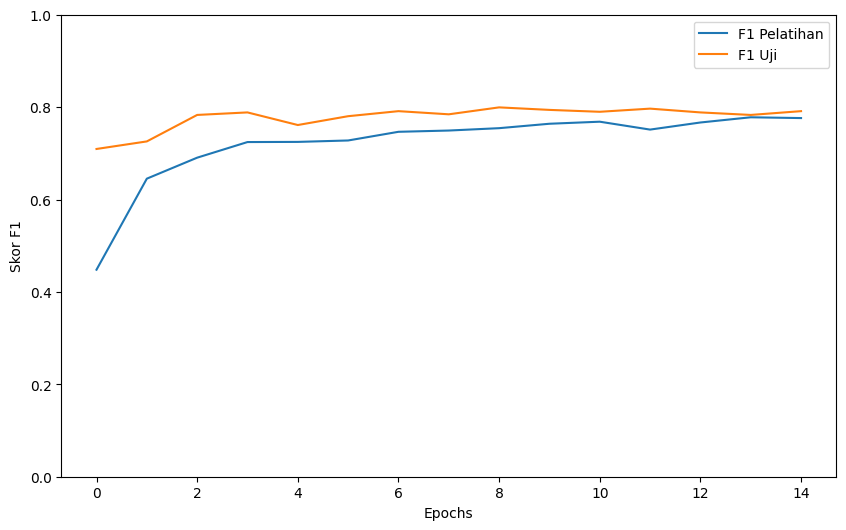

In [54]:
ax, fig = plt.subplots(figsize=(10,6))  
plt.plot(model_history['f1_score'], label='F1 Pelatihan') 
plt.plot(model_history['val_f1_score'], label='F1 Uji') 
plt.xlabel('Epochs')    
plt.ylabel('Skor F1')  
plt.legend()
plt.ylim(0,1)
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\F1_CNNLSTM.png")  
plt.show()       

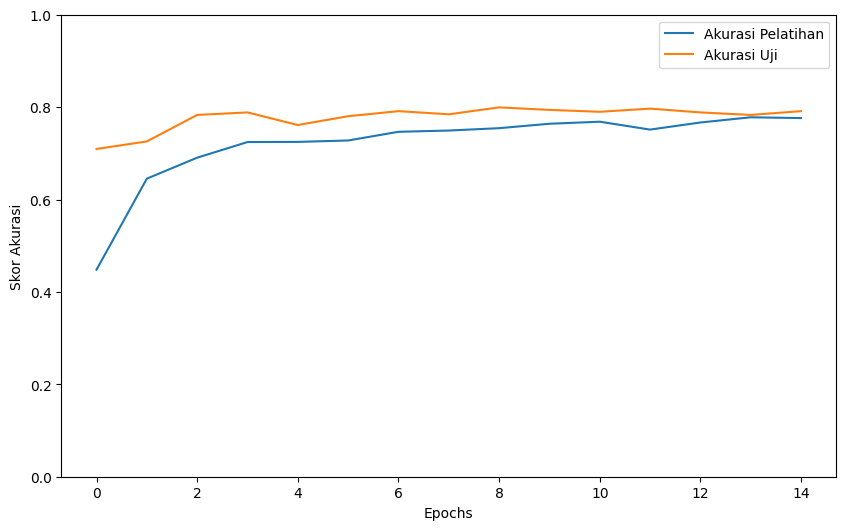

In [55]:
ax, fig = plt.subplots(figsize=(10,6))  
plt.plot(model_history['accuracy'], label='Akurasi Pelatihan') 
plt.plot(model_history['val_accuracy'], label='Akurasi Uji') 
plt.xlabel('Epochs')    
plt.ylabel('Skor Akurasi')  
plt.legend()
plt.ylim(0,1)
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\Akurasi_CNNLSTM.png")  
plt.show()       

In [ ]:
import tensorflow as tf

# Load the model
modelq = tf.keras.models.load_model(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM")

# Use the loaded model for predictions or further training


## LSTM

In [43]:
# MODEL CNN-LSTM
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x) # Add return_sequences=True to keep the sequence dimension

x = tf.keras.layers.Flatten()(x)  # Flatten the output of the LSTM layer

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")



In [44]:
import tensorflow_addons as tfa

METRICS = [
    tf.keras.metrics.TrueNegatives(name='TrueNegative'),
    tf.keras.metrics.FalseNegatives(name='FalseNegative'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=7, average='micro'),
    tf.keras.metrics.CategoricalAccuracy(name='accuracy')
]

# Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=METRICS
)

In [45]:

epoch = 15
# Fit model
waktu=time.time() 
model_history = model.fit(X_train,
  y_train,
  epochs=epoch,
  batch_size=16,
  validation_data=(X_test, y_test),
  verbose=1
  # callbacks=[early_stopping]
)
waktu_total=time.time()-waktu   
print(waktu_total )

Epoch 1/15


183/183 [==============================] - 101s 537ms/step - loss: 1.1924 - TrueNegative: 17439.0000 - FalseNegative: 1896.0000 - precision: 0.8889 - recall: 0.3525 - auc: 0.8689 - f1_score: 0.5229 - accuracy: 0.5232 - val_loss: 0.8438 - val_TrueNegative: 4354.0000 - val_FalseNegative: 317.0000 - val_precision: 0.9043 - val_recall: 0.5675 - val_auc: 0.9427 - val_f1_score: 0.7149 - val_accuracy: 0.7149
Epoch 2/15
183/183 [==============================] - 98s 537ms/step - loss: 0.7953 - TrueNegative: 17386.0000 - FalseNegative: 1185.0000 - precision: 0.9055 - recall: 0.5953 - auc: 0.9465 - f1_score: 0.6974 - accuracy: 0.6974 - val_loss: 0.7612 - val_TrueNegative: 4324.0000 - val_FalseNegative: 219.0000 - val_precision: 0.8741 - val_recall: 0.7012 - val_auc: 0.9524 - val_f1_score: 0.7517 - val_accuracy: 0.7517
Epoch 3/15
183/183 [==============================] - 125s 682ms/step - loss: 0.6949 - TrueNegative: 17369.0000 - FalseNegative: 1014.0000 - precision: 0.9058 - recall: 0.6537 - au

In [46]:
model_history.history

{'loss': [1.1923593282699585,
  0.7952724695205688,
  0.6948864459991455,
  0.6728681325912476,
  0.6373227834701538,
  0.6128422021865845,
  0.5844732522964478,
  0.5704564452171326,
  0.5455371737480164,
  0.5567583441734314,
  0.5332105159759521,
  0.5477006435394287,
  0.5105344653129578,
  0.5017246603965759,
  0.4860614240169525],
 'TrueNegative': [17439.0,
  17386.0,
  17369.0,
  17369.0,
  17358.0,
  17361.0,
  17366.0,
  17374.0,
  17376.0,
  17386.0,
  17396.0,
  17409.0,
  17400.0,
  17384.0,
  17387.0],
 'FalseNegative': [1896.0,
  1185.0,
  1014.0,
  983.0,
  972.0,
  926.0,
  885.0,
  839.0,
  794.0,
  798.0,
  787.0,
  782.0,
  728.0,
  746.0,
  733.0],
 'precision': [0.8888888955116272,
  0.9054545164108276,
  0.9058210849761963,
  0.9071828126907349,
  0.9030470848083496,
  0.9062924385070801,
  0.9100222587585449,
  0.9150241017341614,
  0.9174548387527466,
  0.9212802648544312,
  0.9256377220153809,
  0.9310195446014404,
  0.9290540814399719,
  0.9222316145896912,
  

In [47]:
model.save(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_real", save_format='tf')
with open(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_real_history.pkl", 'wb') as f:
    pickle.dump(model_history.history, f)

INFO:tensorflow:Assets written to: C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_real\assets


INFO:tensorflow:Assets written to: C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_real\assets


In [56]:
with open(r"C:\Lomba\UNITY UNY\Data Mining\results\model_LSTM_real_history.pkl", 'rb') as f:
    model_history = pickle.load(f)  

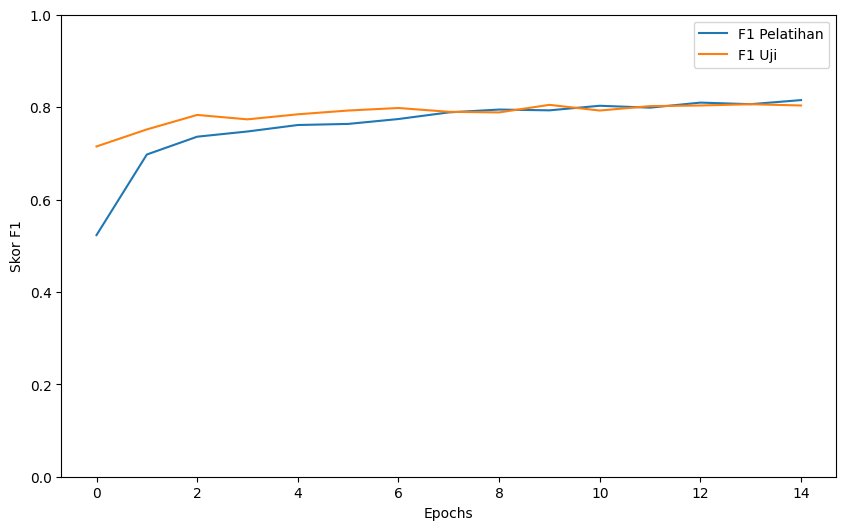

In [52]:
ax, fig = plt.subplots(figsize=(10,6))  
plt.plot(model_history.history['f1_score'], label='F1 Pelatihan') 
plt.plot(model_history.history['val_f1_score'], label='F1 Uji') 
plt.xlabel('Epochs')    
plt.ylabel('Skor F1')  
plt.legend()
plt.ylim(0,1)
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\F1_LSTM.png")  
plt.show()       

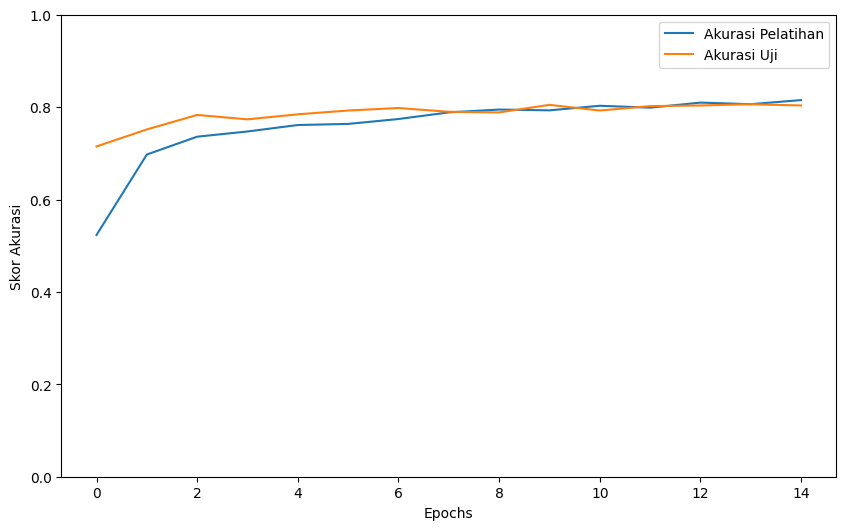

In [57]:
ax, fig = plt.subplots(figsize=(10,6))  
plt.plot(model_history['accuracy'], label='Akurasi Pelatihan') 
plt.plot(model_history['val_accuracy'], label='Akurasi Uji') 
plt.xlabel('Epochs')    
plt.ylabel('Skor Akurasi')  
plt.legend()
plt.ylim(0,1)
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\Akurasi_LSTM.png")  
plt.show()       

## BILSTM

In [ ]:
# MODEL CNN-LSTM
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
print(inputs)

x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))(x) # Add return_sequences=True to keep the sequence dimension

x = tf.keras.layers.Flatten()(x)  # Flatten the output of the LSTM layer

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs, name="model_LSTM")



In [ ]:
import tensorflow_addons as tfa

METRICS = [
    tf.keras.metrics.TrueNegatives(name='TrueNegative'),
    tf.keras.metrics.FalseNegatives(name='FalseNegative'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    tfa.metrics.F1Score(num_classes=7, average='micro'),
    tf.keras.metrics.CategoricalAccuracy(name='accuracy')
]

# Compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=METRICS
)

In [ ]:

epoch = 30
# Fit model

model_history = model.fit(X_train,
  y_train,
  epochs=epoch,
  batch_size=60,
  validation_data=(X_test, y_test),
  verbose=1
  # callbacks=[early_stopping]
)

## Some EDA and Evaluation for Technical Reports

In [ ]:
import matplotlib.pyplot as plt 
import pickle
import pandas as pd

In [ ]:
data=pd.read_csv(r"C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\cleaned_judul_laporan.csv")

In [ ]:
data=data.dropna()

In [ ]:
data

In [ ]:
data[data.instansi=='Divisi Pemasaran dan Pelayanan Pelanggan'] = 'Divisi Pemasaran dan Pelayanan Pelanggan (PLN)'

In [ ]:
data.instansi.value_counts()

In [ ]:
plt.figure(figsize=(15,6))  
plt.bar(data.instansi.value_counts().index,data.instansi.value_counts().values)
plt.xticks(rotation=45, ha='right') 
plt.ylabel('Jumlah Laporan')    
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\jumlah_laporan.png")   
plt.show()


In [ ]:

sizes = data.instansi.value_counts().values
labels = data.instansi.value_counts().index

# Create a figure and a set of subplots
fig, axs = plt.subplots(ncols=1, figsize=(10, 6))

# Plot the pie chart in the first subplot
axs.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)

# Show the plot
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\pie_chart_laporan.png")    
plt.show()

In [ ]:
y_train.value_counts() 

In [ ]:
y_test.value_counts()

In [ ]:
import pickle 

In [ ]:

with open (r"C:\Lomba\UNITY UNY\Data Mining\results\history_judul_laporan_baseline.pkl", 'rb') as f:
    history = pickle.load(f)    

In [ ]:
history

In [ ]:
ax, fig = plt.subplots(figsize=(10,6))  
plt.plot(history['train_accuracy'], label='Akurasi Pelatihan') 
plt.plot(history['valid_accuracy'], label='Akurasi Uji') 
plt.xlabel('Epochs')    
plt.ylabel('Akurasi')  
plt.legend()
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\akurasi_TWEET_Indobert.png")
plt.show()       

In [ ]:
ax, fig = plt.subplots(figsize=(10,6))  
plt.plot(history['train_f1_score'], label='F1 Pelatihan') 
plt.plot(history['valid_f1_score'], label='F1 Uji') 
plt.xlabel('Epochs')    
plt.ylabel('Skor F1')  
plt.legend()
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\F1_TWEET_Indobert.png")
plt.show()       

# WORDCLOUD

In [4]:
from transformers import AutoTokenizer, AutoModel


c:\Lomba\UNITY UNY\Data Mining\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
train_dataset_path = 'train.tsv'
valid_dataset_path = 'valid.tsv'

In [10]:
train_loader,valid_loader=load_tsv()

In [12]:
tokenizer2 = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model2 = AutoModel.from_pretrained("indolem/indobertweet-base-uncased")

In [13]:
model2.load_state_dict(torch.load(r"C:\Lomba\UNITY UNY\Data Mining\results\tweet_judullpaporan.pth"))    

<All keys matched successfully>

In [143]:
model2

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31923, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model2.to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(31923, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [15]:
model2.eval()
validation_loss = 0.0
all_predictions = []
all_labels = []
num_epochs=15   
valid_loader_tqdm = tqdm(valid_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation")

with torch.no_grad():
    for batch in valid_loader_tqdm:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.last_hidden_state[:, 0, :]

        loss = loss_fn(logits,labels)
        validation_loss += loss.item()

        predictions = torch.argmax(logits, dim=1).cpu().tolist()
        all_predictions.extend(predictions)
        all_labels.extend(labels.cpu().tolist())

valid_accuracy = accuracy_score(all_labels, all_predictions)
valid_f1_score = f1_score(all_labels, all_predictions, average='weighted')
valid_error = 1 - valid_accuracy


NameError: name 'epoch' is not defined

In [16]:
model2.eval()
all_predictions = []

with torch.no_grad():
    for batch in valid_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        # No need for labels during prediction
        outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.last_hidden_state[:, 0, :]
        
        predictions = torch.argmax(logits, dim=1).cpu().tolist()
        all_predictions.extend(predictions)

In [17]:
label_mapping={"Kementerian Sosial": 1, "Divisi Pemasaran dan Pelayanan Pelanggan": 2, "Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi": 3,'Kepolisian Negara Republik Indonesia':4,'Direktorat Jenderal Perhubungan Darat':5, 'Kementerian Komunikasi dan Informatika' : 6, 'Direktorat Jenderal Tenaga Kesehatan' :7} 
reverse_label_mapping = {v: k for k, v in label_mapping.items()}


In [18]:
all_predictions_mapped = [reverse_label_mapping[label_idx] for label_idx in all_predictions]


In [19]:
all_predictions_mapped

['Kementerian Sosial',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Perhubungan Darat',
 'Kementerian Komunikasi dan Informatika',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kementerian Sosial',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Tenaga Kesehatan',
 'Direktorat Jenderal Tenaga Kesehatan',
 'Kepolisian Negara Republik Indonesia',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kementerian Sosial',
 'Direktorat Jenderal Perhubungan Darat',
 'Kementerian Komunikasi dan Informatika',
 'Kementerian Sosial',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Perhubungan Darat',
 'Kepolisian Negara Republik Indonesia',
 'Kepolisian Negara Republik Indonesia',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Kem

In [5]:
import pandas as pd
test=pd.read_csv(r"valid.tsv",sep='\t',header=None)

In [23]:
test['predicted']=all_predictions_mapped    

C:\Users\krisn\AppData\Local\Temp\ipykernel_7280\883150122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted']=all_predictions_mapped


In [6]:
test=test.dropna()

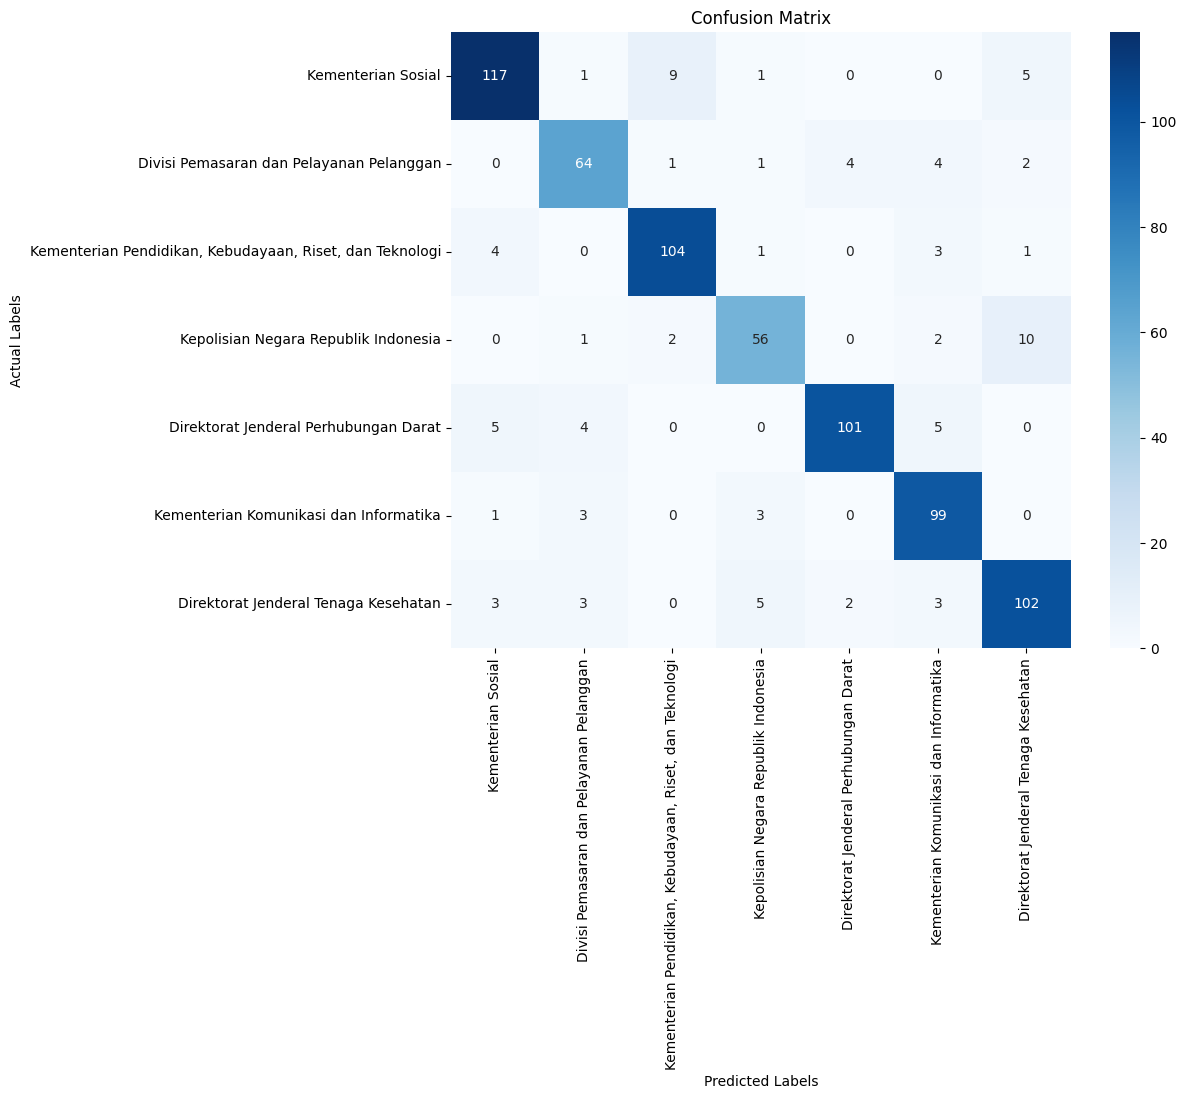

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing predictions
# Assuming the column names are 'predicted' and 'label'

# Extract predicted and actual labels from the DataFrame
predicted_labels = test['predicted']
actual_labels = test[1]

# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\confusion_matrix_TWEET_Indobertweet.png")
plt.show()

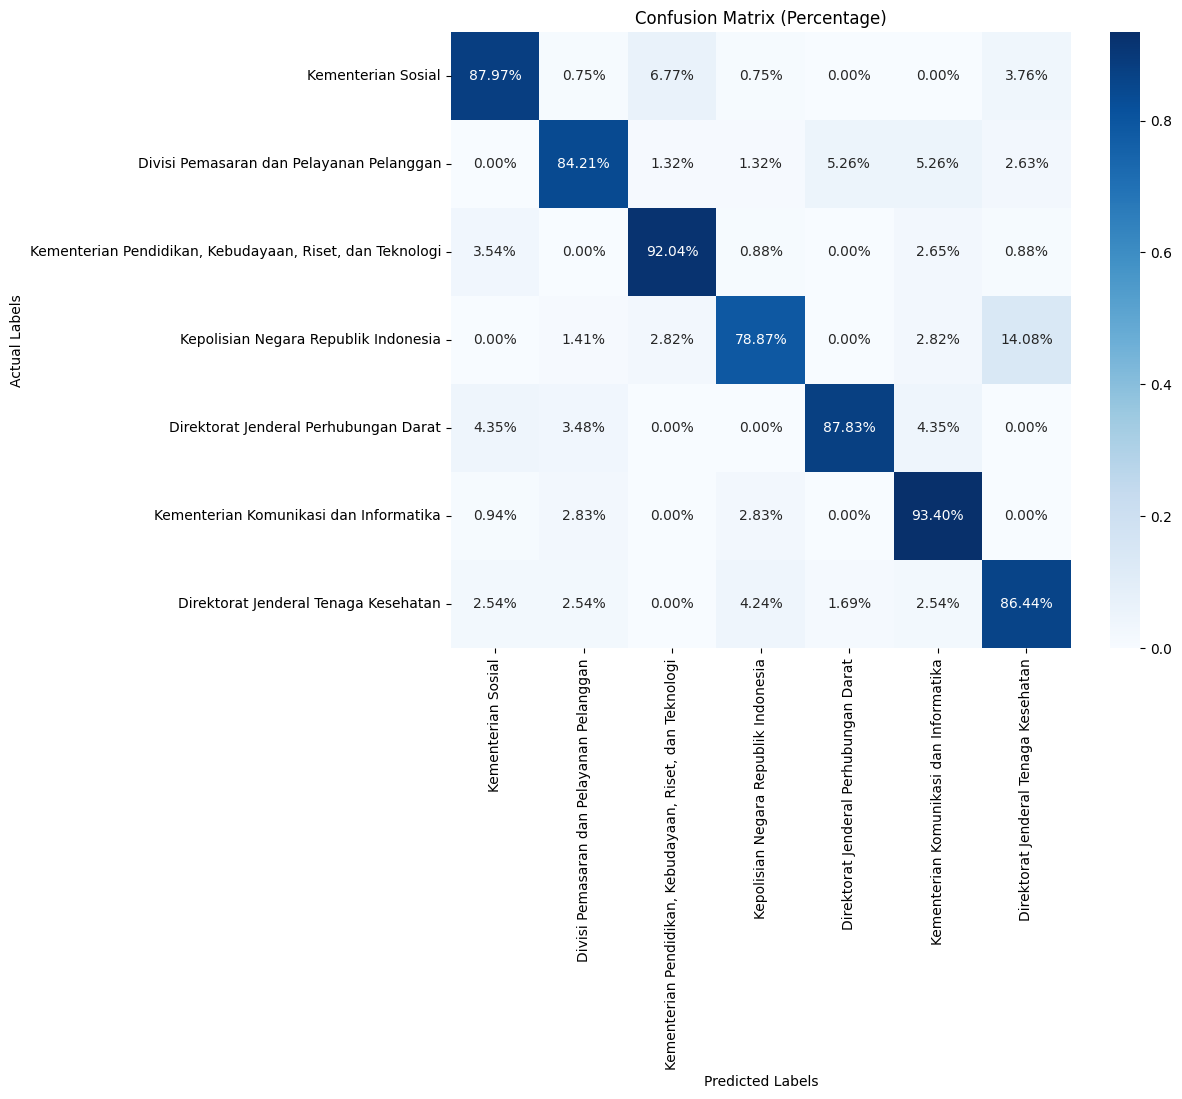

In [25]:
# Extract predicted and actual labels from the DataFrame
import numpy as np 
predicted_labels = test['predicted']
actual_labels = test[1]

# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Calculate percentages for each cell
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix with percentages using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues', 
            xticklabels=label_mapping.keys(), 
            yticklabels=label_mapping.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix (Percentage)')
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\confusion_matrix_TWEET_percentage_Indobertweet.png")
plt.show() 

In [52]:
test_sosial=test[test['predicted']=='Kementerian Sosial']   

In [53]:
test_sosial

0  \
0                    tidak bisa log akun cek bansos   
8                               aplikasi cek bansos   
15   bantu november desember pkh tidak kunjung cair   
18                                   terima manfaat   
34             pkh komponen balita tak kunjung cair   
..                                              ...   
681                           tipu jual beli barang   
691                       bansos bpnt status daftar   
704                       bantu bst tidak beri tahu   
726                                            bpnt   
730                                       adu bantu   

                                        1           predicted  
0                      Kementerian Sosial  Kementerian Sosial  
8                      Kementerian Sosial  Kementerian Sosial  
15                     Kementerian Sosial  Kementerian Sosial  
18                     Kementerian Sosial  Kementerian Sosial  
34                     Kementerian Sosial  Kementerian Sosial  
..                                    ...                 ...  
681  Kepolisian Negara Republik Indonesia  Kementerian Sosial  
691                    Kementerian Sosial  Kementerian Sosial  
704                    Kementerian Sosial  Kementerian Sosial  
726                    Kementerian Sosial  Kementerian Sosial  
730                    Kementerian Sosial  Kementerian Sosial  

[92 rows x 3 columns]

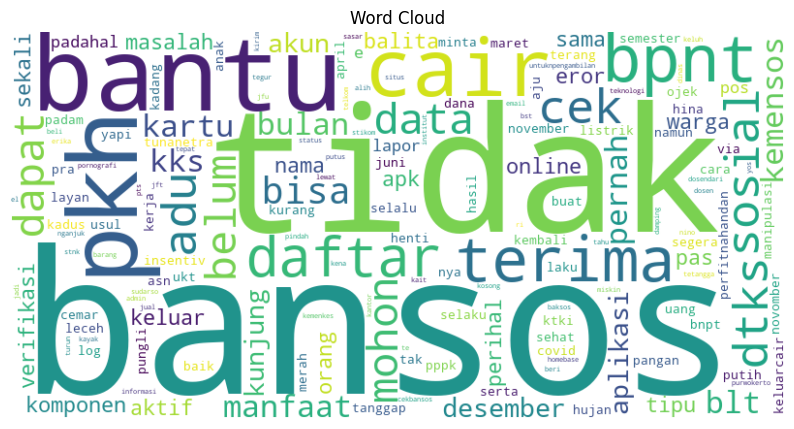

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'text_column' is the column containing the text data
text_data = test_sosial[0].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


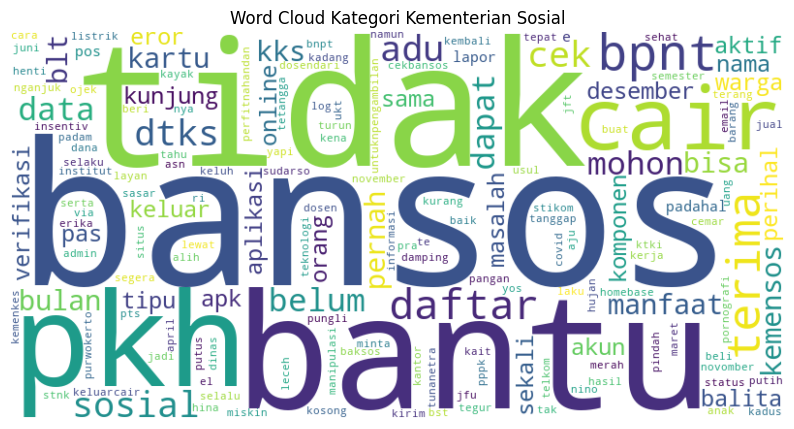

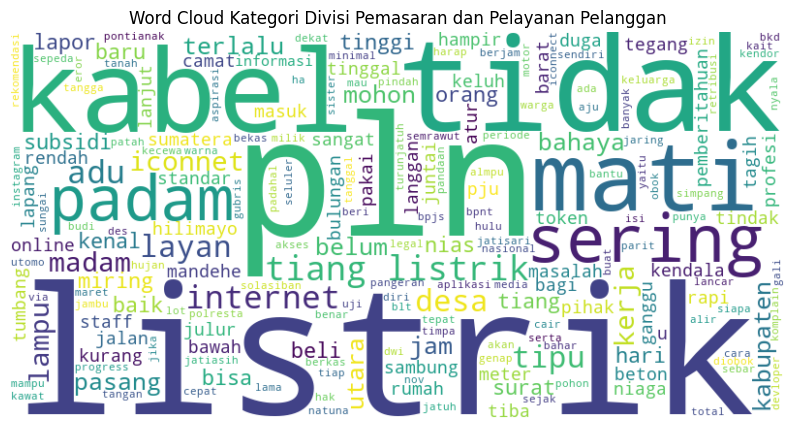

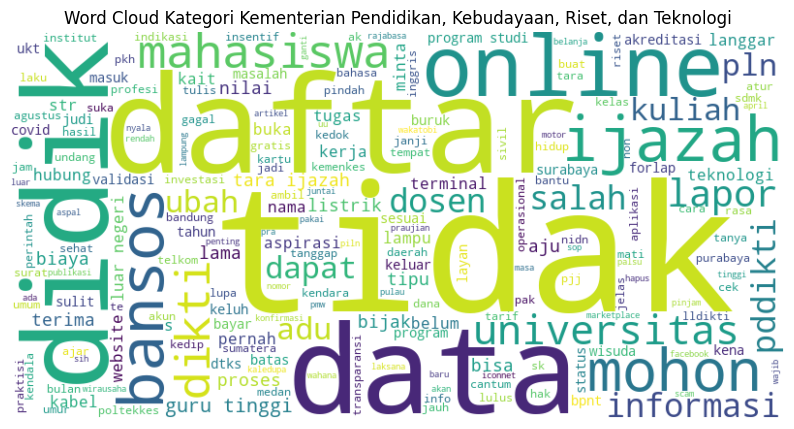

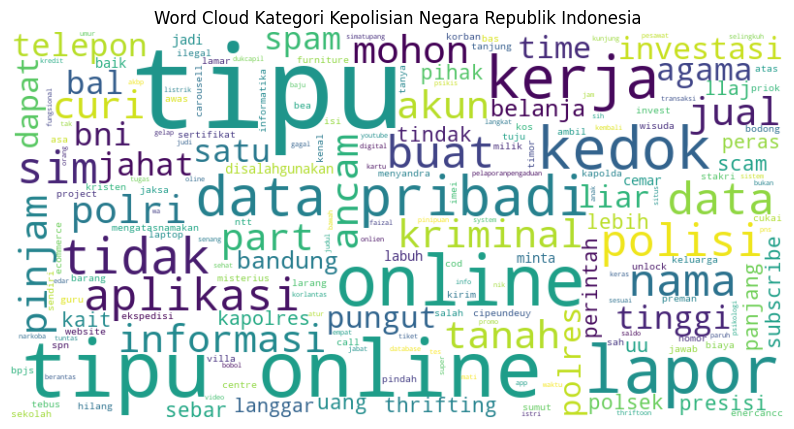

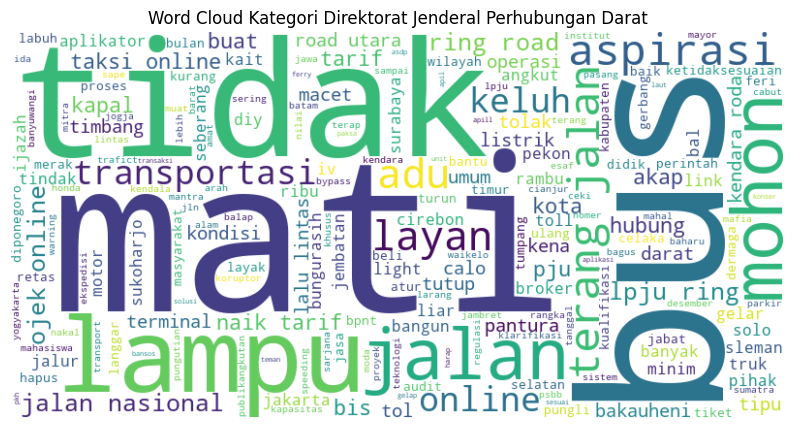

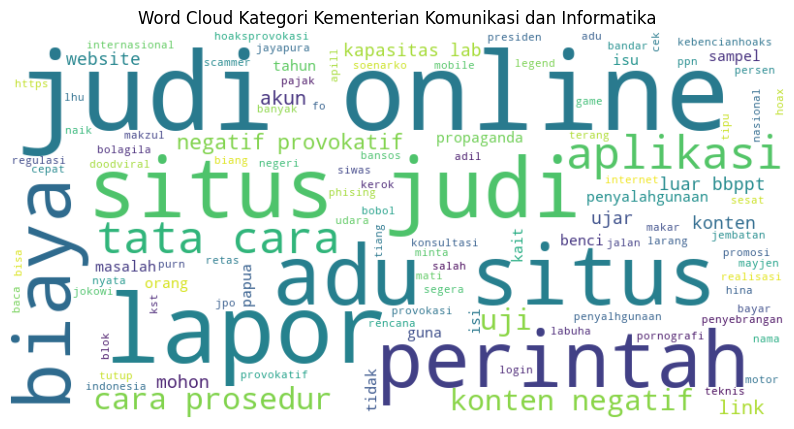

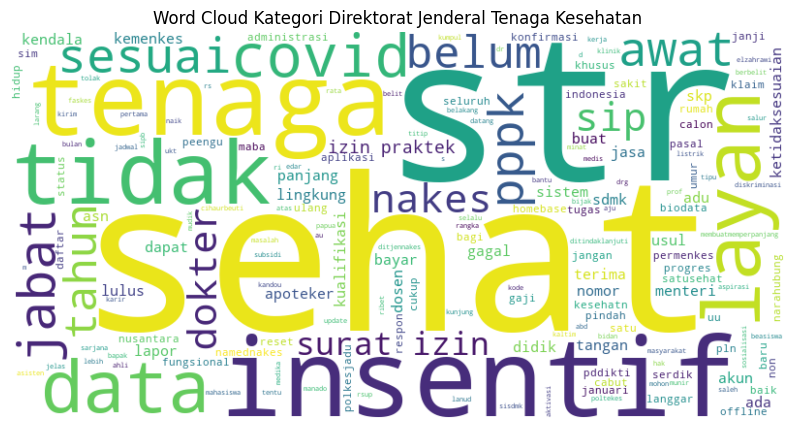

In [60]:
for i in label_mapping.keys()  :
    data=test[test['predicted']==f'{i}']   
    text_data = data[0].str.cat(sep=' ')

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud Kategori {i}')
    plt.savefig (f"C:/Lomba/UNITY UNY/Data Mining/results/wordcloud_Indoberttweet_{i}.png")
    plt.show()

## ML EDA WORDCLOUD

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [8]:
from sklearn.model_selection import train_test_split
train_df=pd.read_csv(r'C:\Lomba\UNITY UNY\Data Mining\scraping\dataset\cleaned_judul_laporan.csv')
train_df=train_df.dropna()  
X_train, X_test, y_train, y_test = train_test_split(train_df['cleaned_judul_laporan'],train_df['instansi'], test_size=0.2, random_state=42) 

In [9]:
import pickle
logistic=pickle.load(open(r"C:\Lomba\UNITY UNY\Data Mining\results\machine learning\Logistic Regression.pkl", 'rb'))  

In [10]:
test

0  \
0                       tidak bisa log akun cek bansos   
1                                pindah homebase dosen   
2    wisuda ilegal salah satu guru tinggi ntt nama ...   
3                          kabel listrik juntai rendah   
4                             tipu kedok pinjam online   
..                                                 ...   
729                                 tipu pinjam online   
730                                          adu bantu   
731  polisi jasa raharja tidak mau buat lapor celak...   
732                                        tipu online   
733                             lapor str panjang sipb   

                                                     1  
0                                   Kementerian Sosial  
1    Kementerian Pendidikan, Kebudayaan, Riset, dan...  
2    Kementerian Pendidikan, Kebudayaan, Riset, dan...  
3             Divisi Pemasaran dan Pelayanan Pelanggan  
4                 Kepolisian Negara Republik Indonesia  
..                                                 ...  
729               Kepolisian Negara Republik Indonesia  
730                                 Kementerian Sosial  
731              Direktorat Jenderal Perhubungan Darat  
732               Kepolisian Negara Republik Indonesia  
733               Direktorat Jenderal Tenaga Kesehatan  

[732 rows x 2 columns]

In [11]:
test=test.dropna()

In [12]:
tfidf_vectorizer = TfidfVectorizer( max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)   

In [13]:
testted=tfidf_vectorizer.transform(test[0]) 

In [14]:
predicted_labels = logistic.predict(testted.toarray())   

In [15]:
label_map = pickle.load(open(r"C:\Lomba\UNITY UNY\Data Mining\results\machine learning\Logistic Regression_label_mapping.pkl", 'rb'))   

In [44]:
predicted_labels_mapped = [label_map[label_idx] for label_idx in predicted_labels]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [45]:
label_map

array(['Direktorat Jenderal Perhubungan Darat',
       'Direktorat Jenderal Tenaga Kesehatan',
       'Divisi Pemasaran dan Pelayanan Pelanggan (PLN)',
       'Kementerian Komunikasi dan Informatika',
       'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
       'Kementerian Sosial', 'Kepolisian Negara Republik Indonesia'],
      dtype=object)

In [42]:
label_map[2]="Divisi Pemasaran dan Pelayanan Pelanggan (PLN)"

In [196]:
predicted_labels_mapped

['Kementerian Sosial',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Perhubungan Darat',
 'Kementerian Komunikasi dan Informatika',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kementerian Sosial',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Tenaga Kesehatan',
 'Direktorat Jenderal Tenaga Kesehatan',
 'Direktorat Jenderal Perhubungan Darat',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kementerian Sosial',
 'Direktorat Jenderal Perhubungan Darat',
 'Kementerian Komunikasi dan Informatika',
 'Kementerian Sosial',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Perhubungan Darat',
 'Kepolisian Negara Republik Indonesia',
 'Kementerian Komunikasi dan Informatika',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 '

In [189]:
predicted_labels_mapped

['Kementerian Sosial',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Perhubungan Darat',
 'Kementerian Komunikasi dan Informatika',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kementerian Sosial',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Tenaga Kesehatan',
 'Direktorat Jenderal Tenaga Kesehatan',
 'Direktorat Jenderal Perhubungan Darat',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Divisi Pemasaran dan Pelayanan Pelanggan',
 'Kementerian Sosial',
 'Direktorat Jenderal Perhubungan Darat',
 'Kementerian Komunikasi dan Informatika',
 'Kementerian Sosial',
 'Kepolisian Negara Republik Indonesia',
 'Direktorat Jenderal Perhubungan Darat',
 'Kepolisian Negara Republik Indonesia',
 'Kementerian Komunikasi dan Informatika',
 'Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi',
 '

In [19]:
test['predicted_ml']=predicted_labels_mapped    

In [23]:
test

0  \
0                       tidak bisa log akun cek bansos   
1                                pindah homebase dosen   
2    wisuda ilegal salah satu guru tinggi ntt nama ...   
3                          kabel listrik juntai rendah   
4                             tipu kedok pinjam online   
..                                                 ...   
729                                 tipu pinjam online   
730                                          adu bantu   
731  polisi jasa raharja tidak mau buat lapor celak...   
732                                        tipu online   
733                             lapor str panjang sipb   

                                                     1  \
0                                   Kementerian Sosial   
1    Kementerian Pendidikan, Kebudayaan, Riset, dan...   
2    Kementerian Pendidikan, Kebudayaan, Riset, dan...   
3             Divisi Pemasaran dan Pelayanan Pelanggan   
4                 Kepolisian Negara Republik Indonesia   
..                                                 ...   
729               Kepolisian Negara Republik Indonesia   
730                                 Kementerian Sosial   
731              Direktorat Jenderal Perhubungan Darat   
732               Kepolisian Negara Republik Indonesia   
733               Direktorat Jenderal Tenaga Kesehatan   

                                          predicted_ml  
0                                   Kementerian Sosial  
1    Kementerian Pendidikan, Kebudayaan, Riset, dan...  
2    Kementerian Pendidikan, Kebudayaan, Riset, dan...  
3             Divisi Pemasaran dan Pelayanan Pelanggan  
4                 Kepolisian Negara Republik Indonesia  
..                                                 ...  
729               Kepolisian Negara Republik Indonesia  
730                                 Kementerian Sosial  
731               Kepolisian Negara Republik Indonesia  
732               Kepolisian Negara Republik Indonesia  
733               Direktorat Jenderal Tenaga Kesehatan  

[732 rows x 3 columns]

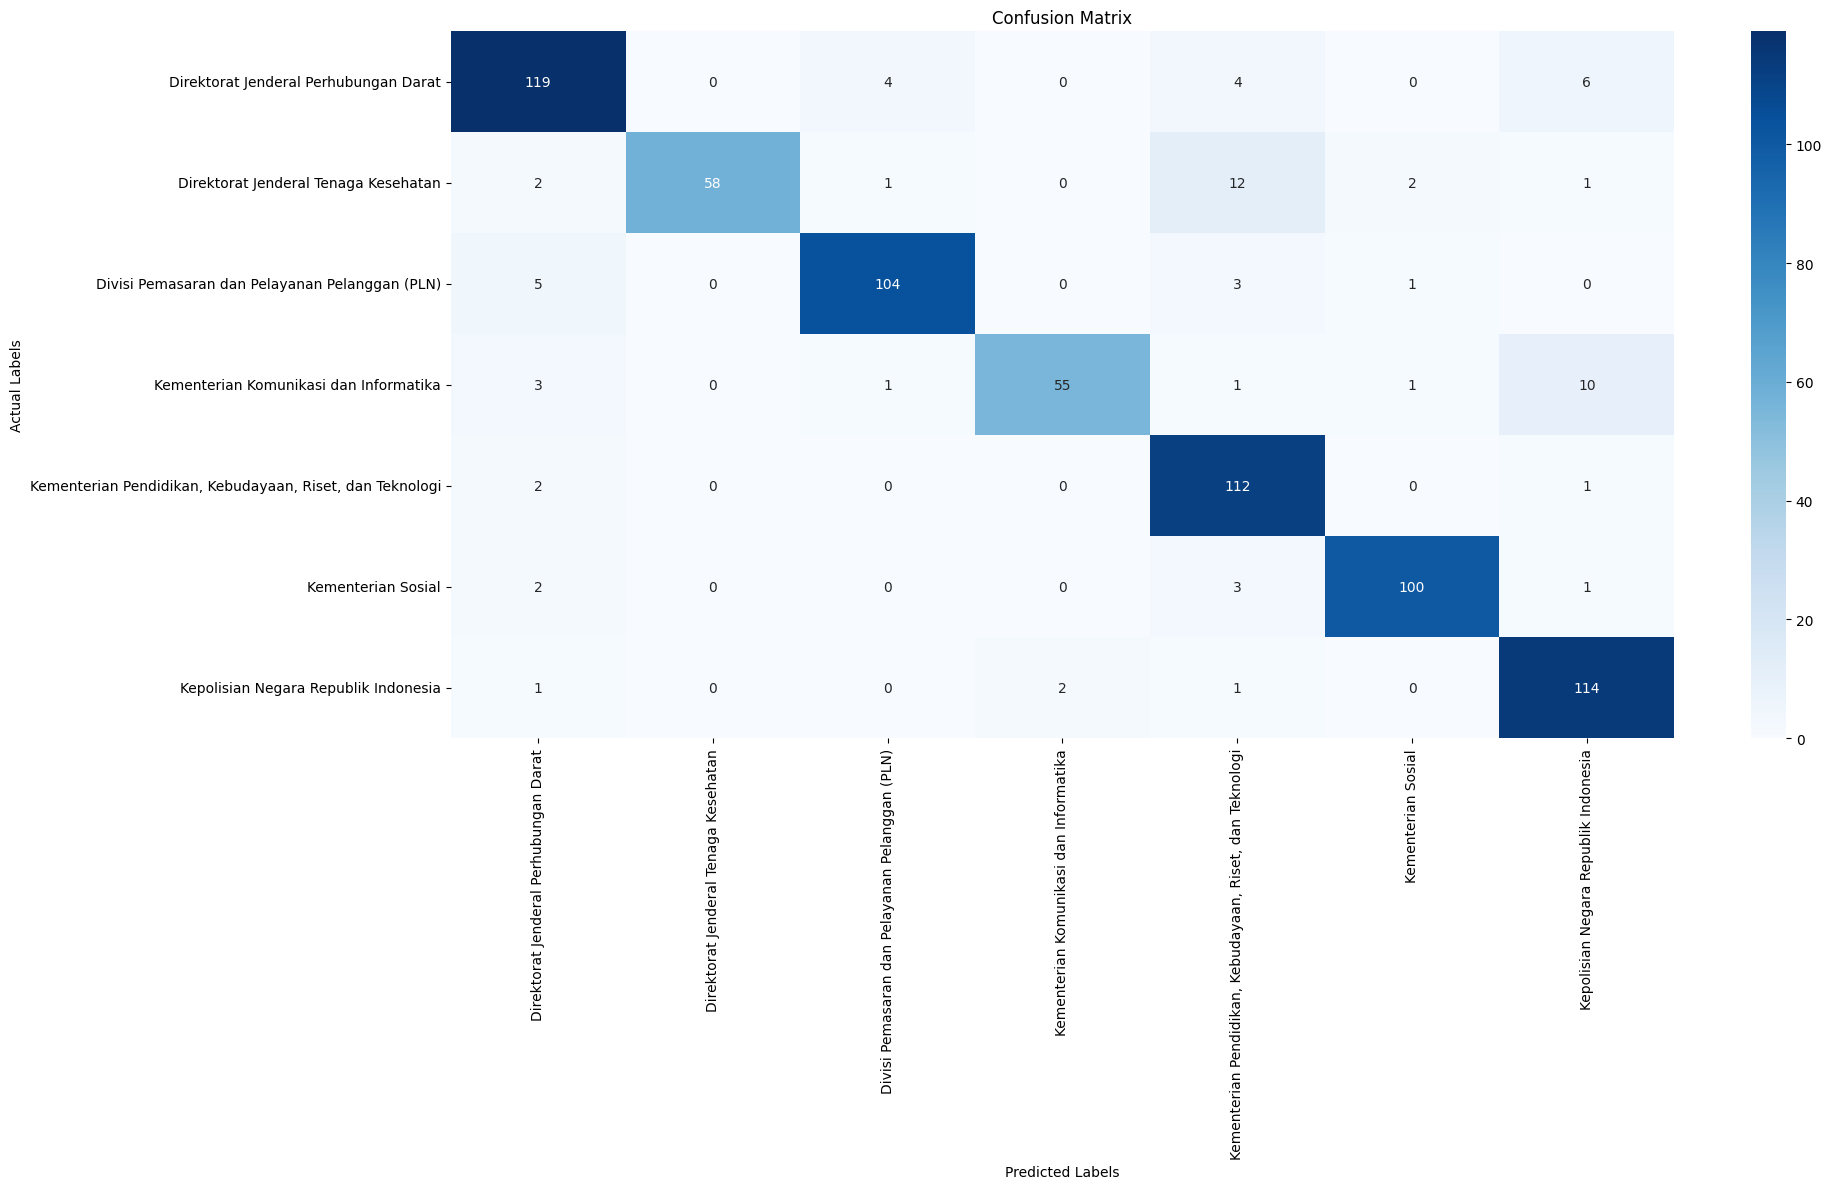

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns   
predicted_labels = test['predicted_ml']
actual_labels = test[1]

# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Display the confusion matrix using seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_map, 
            yticklabels=label_map)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\confusion_matrix_ML_Logistic.png")
plt.show()

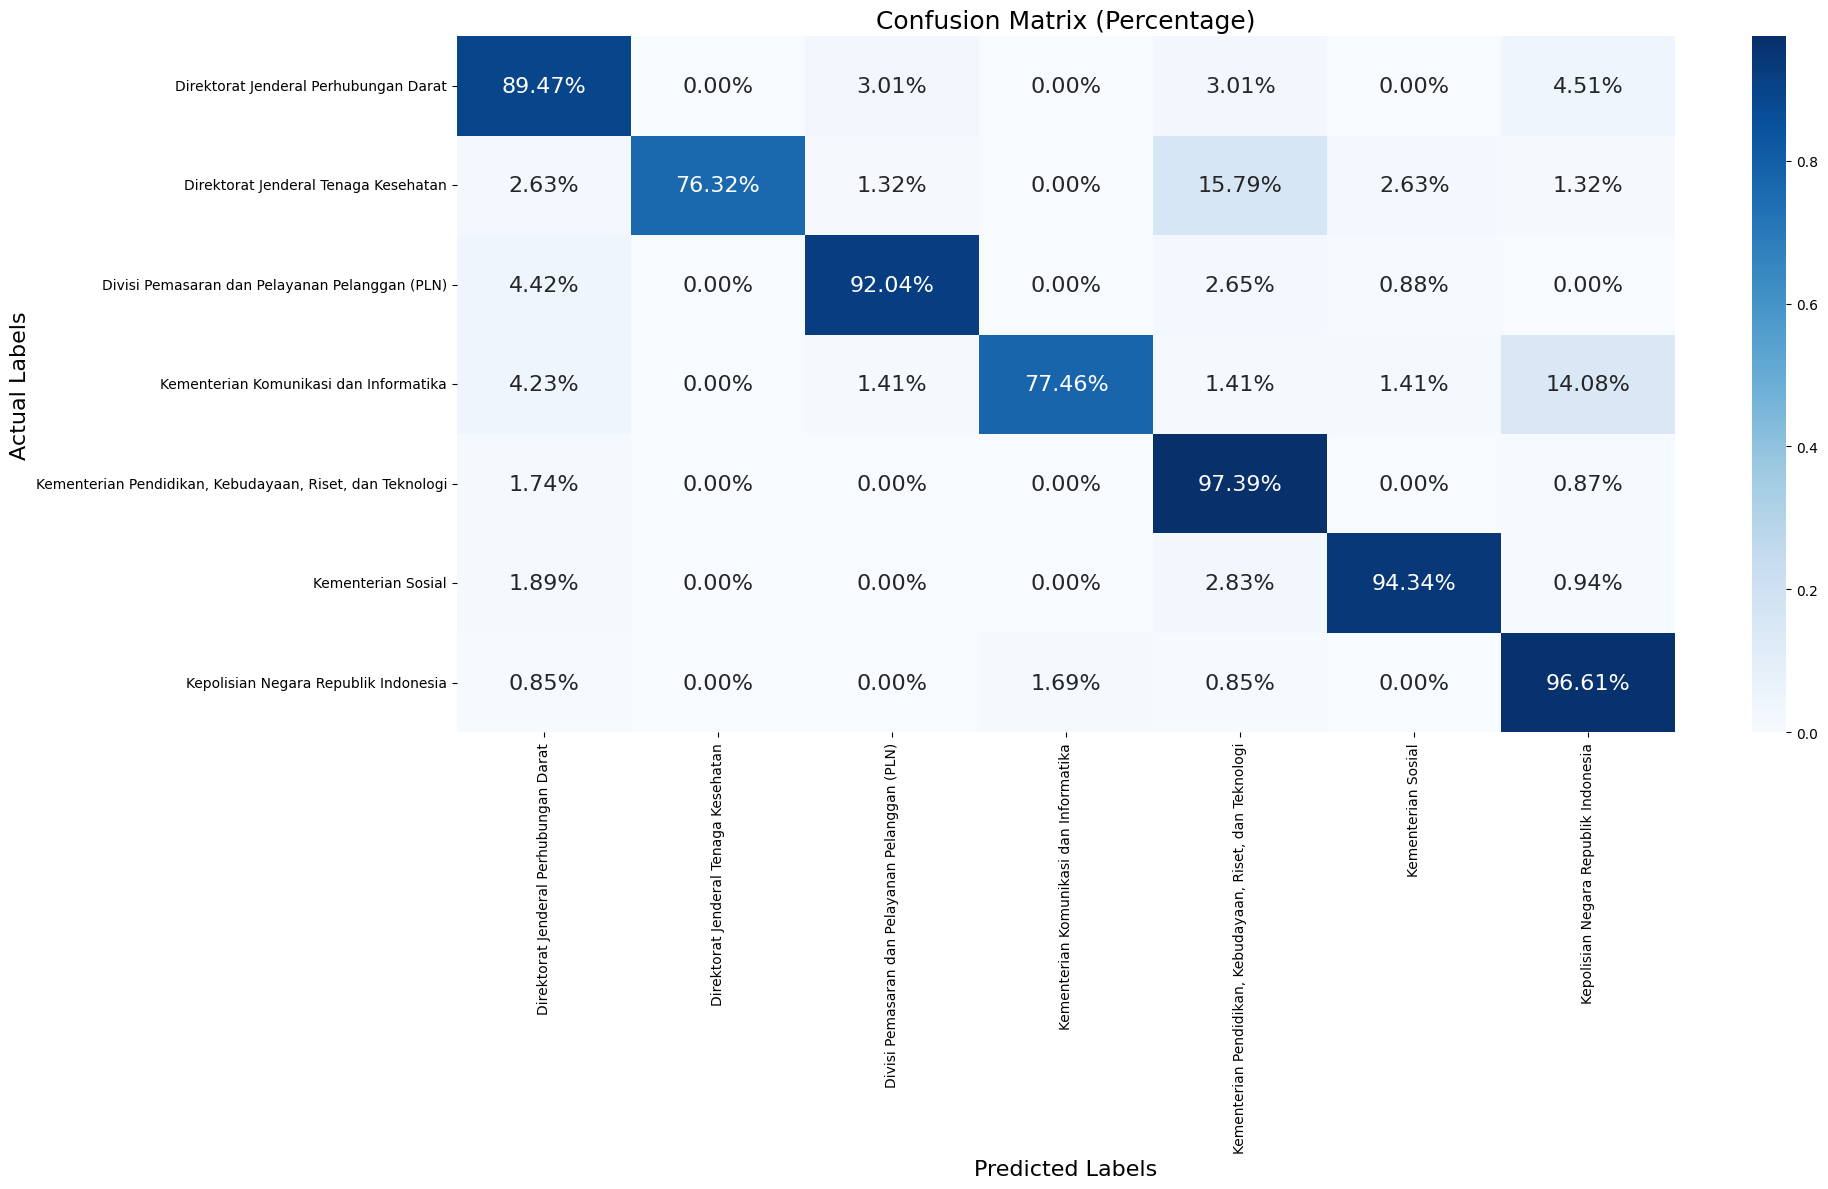

In [46]:
# Extract predicted and actual labels from the DataFrame
import numpy as np 
predicted_labels = test['predicted_ml']
actual_labels = test[1]

# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Calculate percentages for each cell
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display the confusion matrix with percentages using seaborn
plt.figure(figsize=(20, 12))
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues', 
            xticklabels=label_map, 
            yticklabels=label_map,
            annot_kws={"size": 16})  # Adjust font size here
plt.xlabel('Predicted Labels', fontsize=16)  # Adjust x-axis label font size
plt.ylabel('Actual Labels', fontsize=16)     # Adjust y-axis label font size
plt.title('Confusion Matrix (Percentage)', fontsize=18)  # Adjust title font size
plt.tight_layout()
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\confusion_matrix_Percentage_ML_Logistic.png")
plt.show() 


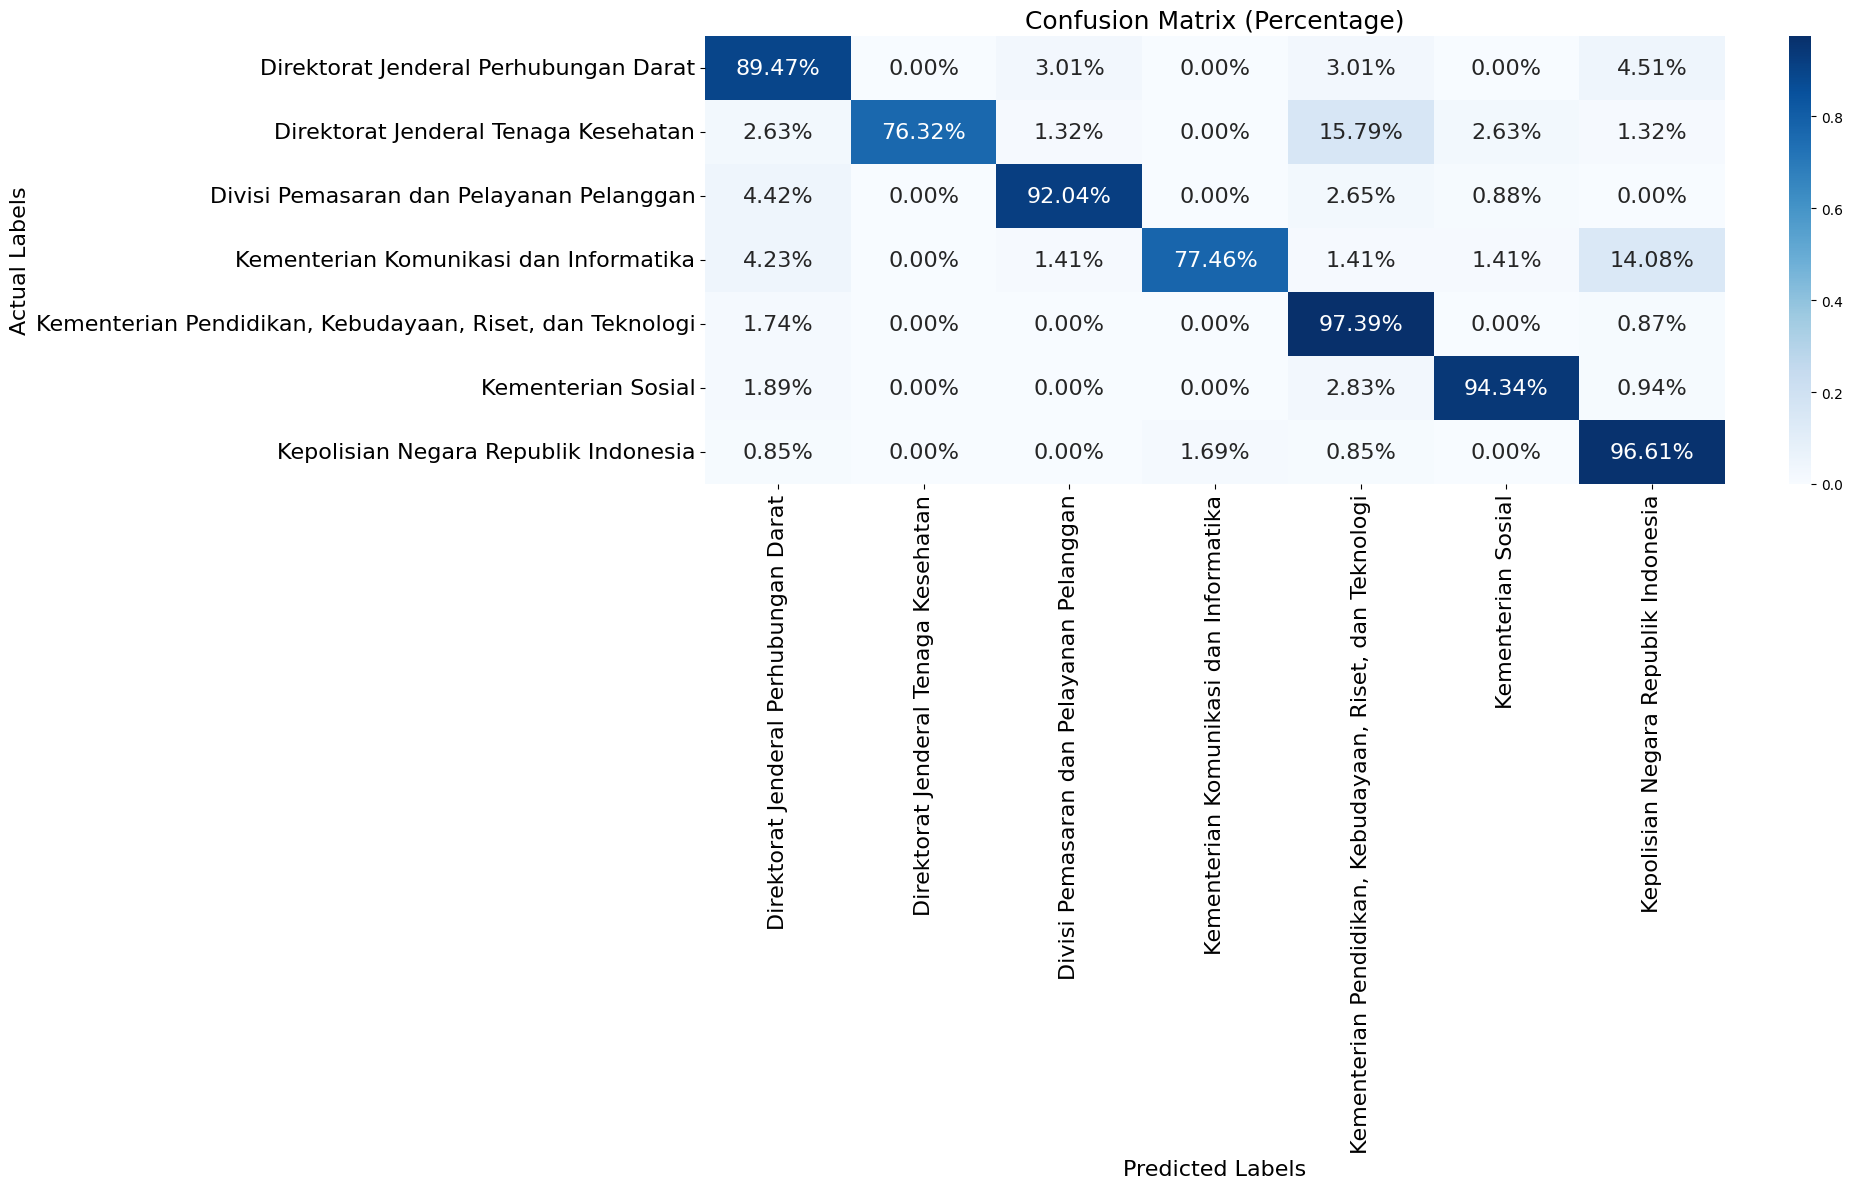

In [39]:
# Display the confusion matrix with percentages using seaborn
plt.figure(figsize=(20, 12))
heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt='.2%', cmap='Blues', 
                      xticklabels=label_map, 
                      yticklabels=label_map,
                      annot_kws={"size": 15})  # Adjust annotation font size here
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)  # Adjust x-axis label font size
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)  # Adjust y-axis label font size
plt.xlabel('Predicted Labels', fontsize=16)  # Adjust x-axis label font size
plt.ylabel('Actual Labels', fontsize=16)     # Adjust y-axis label font size
plt.title('Confusion Matrix (Percentage)', fontsize=18)  # Adjust title font size
plt.tight_layout()
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\confusion_matrix_Percentage_ML_Logistic.png")
plt.show() 


#### Analisis ML FOR MISCLASSIFIED

In [68]:
filtered_data = test[(test[1] == 'Kementerian Komunikasi dan Informatika') & (test['predicted_ml'] == 'Kepolisian Negara Republik Indonesia')]


In [69]:
filtered_data.rename(columns={0: 'Judul Laporan', 1: 'Instansi', 'predicted_ml': 'Prediksi'}, inplace=True)

C:\Users\krisn\AppData\Local\Temp\ipykernel_21908\4008618890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={0: 'Judul Laporan', 1: 'Instansi', 'predicted_ml': 'Prediksi'}, inplace=True)


In [70]:
filtered_data   

Judul Laporan  \
65                            telepon misterius   
90   aplikasi spn lapor tidak dapat kirim lapor   
144                                        tipu   
250            ecommerce menyandra data pribadi   
325                                  data sebar   
406             tipu promo tiket pesawat online   
451                       selingkuh istri orang   
501                                        scam   
611             telegram hack orang tidak kenal   
630                                        tipu   

                                   Instansi  \
65   Kementerian Komunikasi dan Informatika   
90   Kementerian Komunikasi dan Informatika   
144  Kementerian Komunikasi dan Informatika   
250  Kementerian Komunikasi dan Informatika   
325  Kementerian Komunikasi dan Informatika   
406  Kementerian Komunikasi dan Informatika   
451  Kementerian Komunikasi dan Informatika   
501  Kementerian Komunikasi dan Informatika   
611  Kementerian Komunikasi dan Informatika   
630  Kementerian Komunikasi dan Informatika   

                                 Prediksi  
65   Kepolisian Negara Republik Indonesia  
90   Kepolisian Negara Republik Indonesia  
144  Kepolisian Negara Republik Indonesia  
250  Kepolisian Negara Republik Indonesia  
325  Kepolisian Negara Republik Indonesia  
406  Kepolisian Negara Republik Indonesia  
451  Kepolisian Negara Republik Indonesia  
501  Kepolisian Negara Republik Indonesia  
611  Kepolisian Negara Republik Indonesia  
630  Kepolisian Negara Republik Indonesia

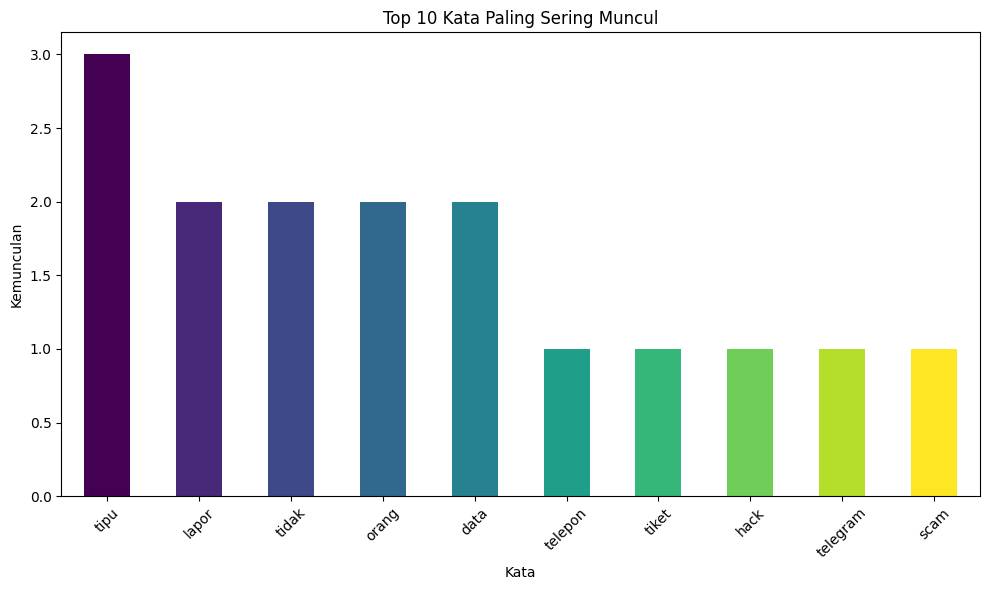

In [71]:
all_text = ' '.join(filtered_data['Judul Laporan'])

# Split the text into individual words
all_words = all_text.split()

# Count occurrences of each word
word_counts = pd.Series(all_words).value_counts()

# Plot the top 10 most common words with varying colors
plt.figure(figsize=(10, 6))

# Calculate colors based on count
colors = plt.cm.viridis(np.linspace(0, 1, len(word_counts.head(10))))

# Plot bar chart with varying colors
word_counts.head(10).plot(kind='bar', color=colors)

plt.title('Top 10 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Kemunculan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Lomba\UNITY UNY\Data Mining\results\top_10_kata_Kementerian Komunikasi dan Informatika.png")  

plt.show()

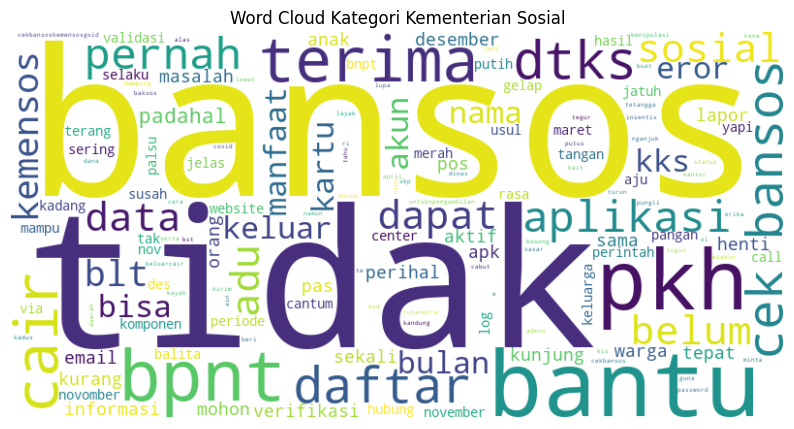

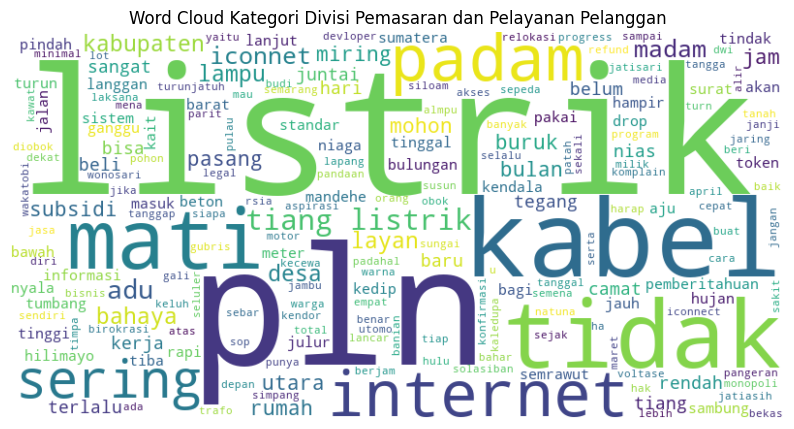

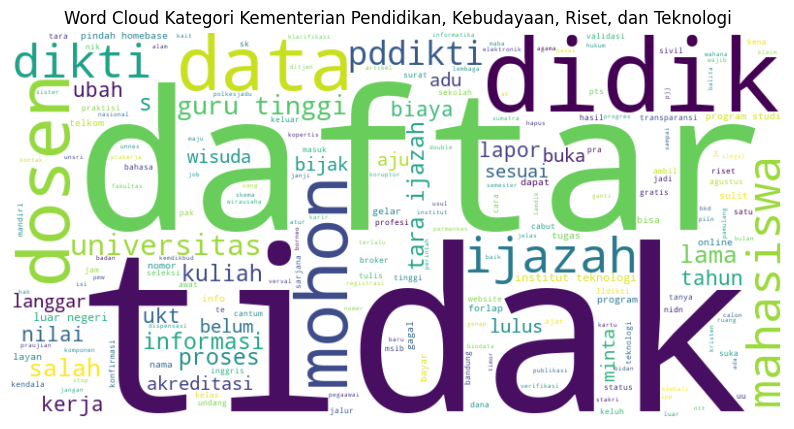

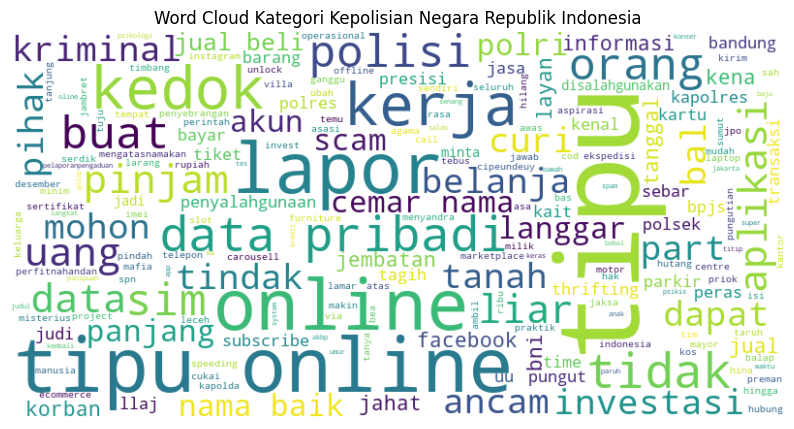

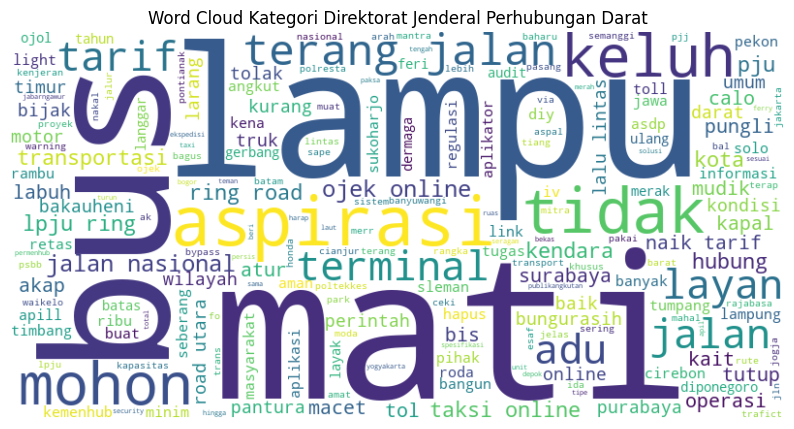

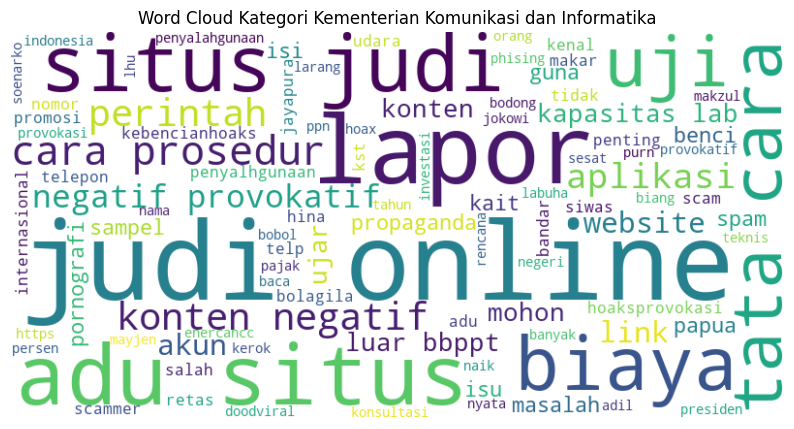

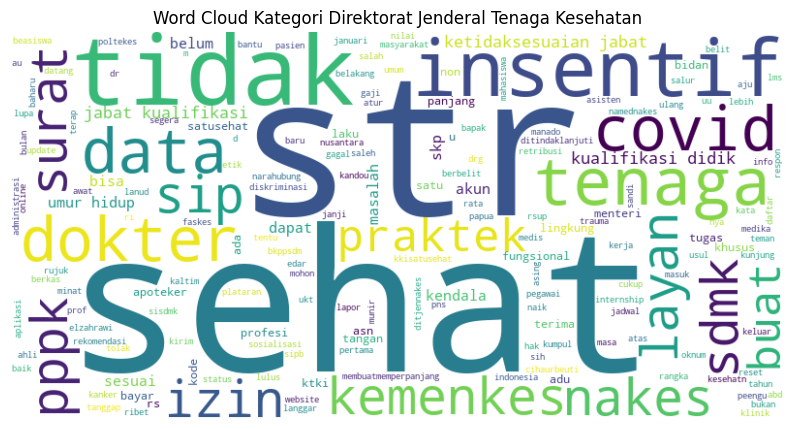

In [201]:
for i in label_mapping.keys()  :
    data=test[test['predicted_ml']==f'{i}']   
    text_data = data[0].str.cat(sep=' ')

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud Kategori {i}')
    plt.savefig (f"C:/Lomba/UNITY UNY/Data Mining/results/wordcloud_logistic_regression_{i}.png")
    plt.show()

In [186]:
log_history=pickle.load(open(r"C:\Lomba\UNITY UNY\Data Mining\results\machine learning\Logistic Regression_classification_rep.pkl", 'rb'))

In [187]:
print(log_history)

                                                          precision    recall  f1-score   support

                   Direktorat Jenderal Perhubungan Darat       0.82      0.89      0.85       131
                    Direktorat Jenderal Tenaga Kesehatan       0.95      0.76      0.84        75
                Divisi Pemasaran dan Pelayanan Pelanggan       0.93      0.90      0.92       121
                  Kementerian Komunikasi dan Informatika       0.97      0.78      0.86        80
Kementerian Pendidikan, Kebudayaan, Riset, dan Teknologi       0.75      0.93      0.83       112
                                      Kementerian Sosial       0.94      0.86      0.90       110
                    Kepolisian Negara Republik Indonesia       0.76      0.81      0.78       104

                                                accuracy                           0.86       733
                                               macro avg       0.87      0.85      0.86       733
                  

In [26]:
import matplotlib.pyplot as plt
import pickle 
history=pickle.load(open(r"C:\Lomba\UNITY UNY\Data Mining\results\history_judullpaporan_baseline.pkl", 'rb'))   

In [27]:
history

defaultdict(list,
            {'train_loss': [0.2873496137567006],
             'train_accuracy': [0.9330829634687606],
             'train_f1_score': [0.9342031084175931],
             'train_error': [0.06691703653123937],
             'valid_loss': [0.5709392519100852],
             'valid_accuracy': [0.8784153005464481],
             'valid_f1_score': [0.8783037992820267],
             'valid_error': [0.12158469945355188],
             'average_waktu': [153.98429447174072],
             'epoch': [25]})